In [1]:
import pandas as pd
import os
import pickle as pkl

In [2]:
# test 2

# open each csv file and read it into a pandas dataframe
name_of_variables = pd.read_csv('/Users/fabienaugsburger/Documents/GitHub/master-project/variable_list_24_v2_1.csv')
name_of_variables = name_of_variables['variable'].tolist()

# Create a new list of variables
new_name_of_variables = []
for variable in name_of_variables:
    if variable == 'geopotential':
        new_name_of_variables.extend(['geopotential_500', 'geopotential_1000'])
    else:
        new_name_of_variables.append(variable)

# Iterate over the new list of variables
for i in range(0, len(new_name_of_variables)):

    print(new_name_of_variables[i])

    locals()[f'max_{new_name_of_variables[i]}'] = pd.DataFrame()
    locals()[f'min_{new_name_of_variables[i]}'] = pd.DataFrame()
    locals()[f'mean_{new_name_of_variables[i]}'] = pd.DataFrame()
    locals()[f'sigma_{new_name_of_variables[i]}'] = pd.DataFrame()

    for j in range (1,96+1):
        if 'geopotential' in new_name_of_variables[i]:
            for k in [500, 1000]:
                df_max_temp = pd.read_csv('/Users/fabienaugsburger/Documents/GitHub/master-project/datasets_3h/geopotential/storm_' + str(j) + '/max_'+ str(j) + '_' + str(k) + '.csv')
                df_min_temp = pd.read_csv('/Users/fabienaugsburger/Documents/GitHub/master-project/datasets_3h/geopotential/storm_' + str(j) + '/min_'+ str(j) + '_' + str(k) + '.csv')
                df_mean_temp = pd.read_csv('/Users/fabienaugsburger/Documents/GitHub/master-project/datasets_3h/geopotential/storm_' + str(j) + '/mean_'+ str(j) + '_' + str(k) + '.csv')
                df_sigma_temp = pd.read_csv('/Users/fabienaugsburger/Documents/GitHub/master-project/datasets_3h/geopotential/storm_' + str(j) + '/std_'+ str(j) + '_' + str(k) + '.csv')

        else:
            df_max_temp = pd.read_csv('/Users/fabienaugsburger/Documents/GitHub/master-project/datasets_3h/' + new_name_of_variables[i] + '/storm_' + str(j) + '/max_'+ str(j) + '_0.csv')
            df_min_temp = pd.read_csv('/Users/fabienaugsburger/Documents/GitHub/master-project/datasets_3h/' + new_name_of_variables[i] + '/storm_' + str(j) + '/min_'+ str(j) + '_0.csv')
            df_mean_temp = pd.read_csv('/Users/fabienaugsburger/Documents/GitHub/master-project/datasets_3h/' + new_name_of_variables[i] + '/storm_' + str(j) + '/mean_'+ str(j) + '_0.csv')
            df_sigma_temp = pd.read_csv('/Users/fabienaugsburger/Documents/GitHub/master-project/datasets_3h/' + new_name_of_variables[i] + '/storm_' + str(j) + '/std_'+ str(j) + '_0.csv')

        df_max_temp = df_max_temp.drop(columns = ['Unnamed: 0'])
        df_min_temp = df_min_temp.drop(columns = ['Unnamed: 0'])
        df_mean_temp = df_mean_temp.drop(columns = ['Unnamed: 0'])
        df_sigma_temp = df_sigma_temp.drop(columns = ['Unnamed: 0'])

        locals()[f'max_{new_name_of_variables[i]}'][f'storm_{j}'] = df_max_temp['0']
        locals()[f'min_{new_name_of_variables[i]}'][f'storm_{j}'] = df_min_temp['0']# = pd.concat([locals()[f'min_{new_name_of_variables[i]}'], df_min_temp], axis=0)
        locals()[f'mean_{new_name_of_variables[i]}'][f'storm_{j}'] = df_mean_temp['0'] #= pd.concat([locals()[f'mean_{new_name_of_variables[i]}'], df_mean_temp], axis=0)
        locals()[f'sigma_{new_name_of_variables[i]}'][f'storm_{j}'] = df_sigma_temp['0'] #= pd.concat([locals()[f'sigma_{new_name_of_variables[i]}'], df_sigma_temp], axis=0)

10m_u_component_of_wind
10m_v_component_of_wind
2m_dewpoint_temperature
2m_temperature
cloud_base_height
convective_available_potential_energy
convective_inhibition
convective_precipitation
convective_rain_rate
convective_snowfall
geopotential_500
geopotential_1000
high_cloud_cover
instantaneous_10m_wind_gust
k_index
large_scale_precipitation
large_scale_snowfall
mean_large_scale_precipitation_rate
mean_top_net_long_wave_radiation_flux
mean_top_net_short_wave_radiation_flux
mean_total_precipitation_rate
mean_sea_level_pressure
mean_surface_latent_heat_flux
mean_surface_net_long_wave_radiation_flux
mean_surface_net_short_wave_radiation_flux
mean_vertically_integrated_moisture_divergence
surface_pressure
total_precipitation
total_totals_index


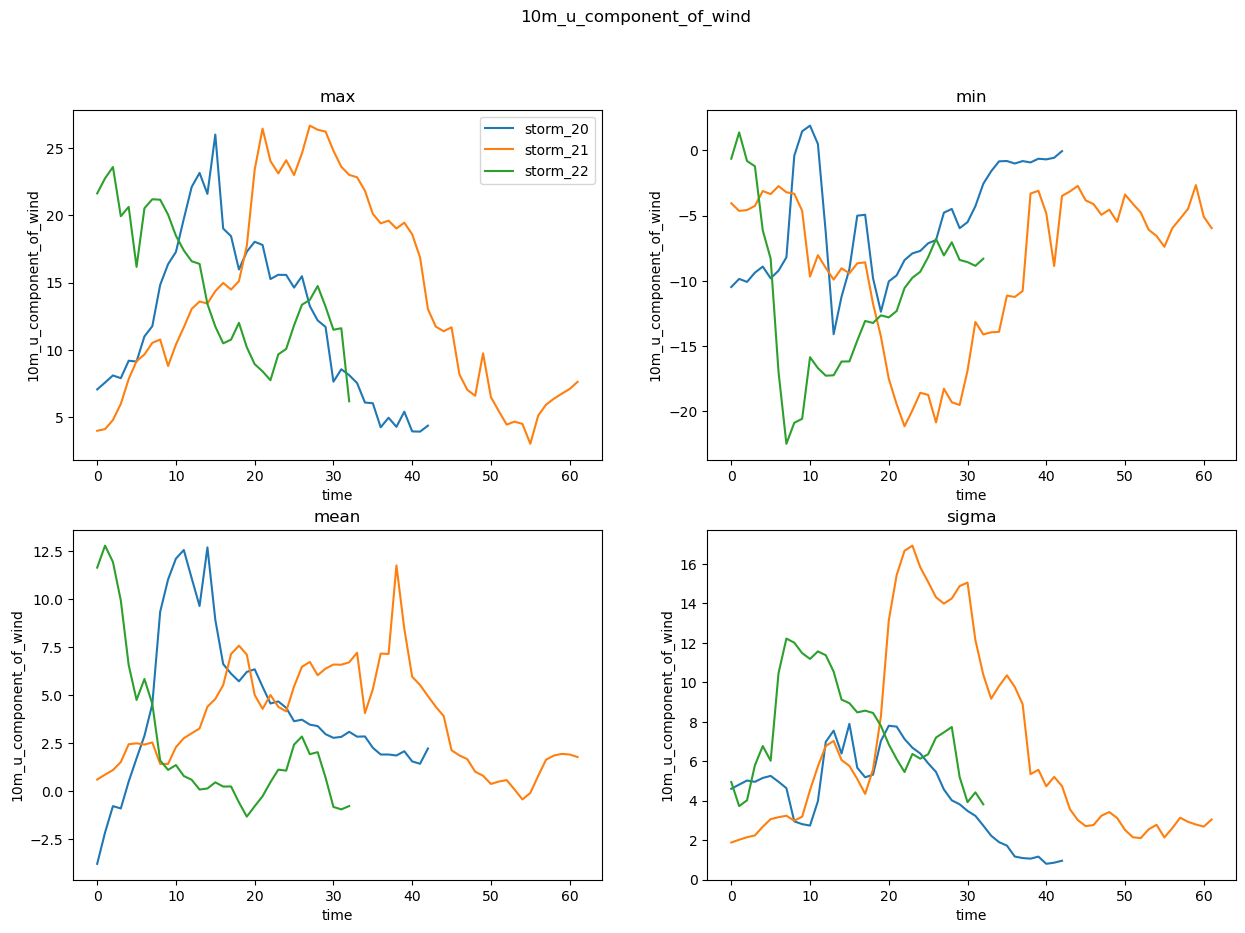

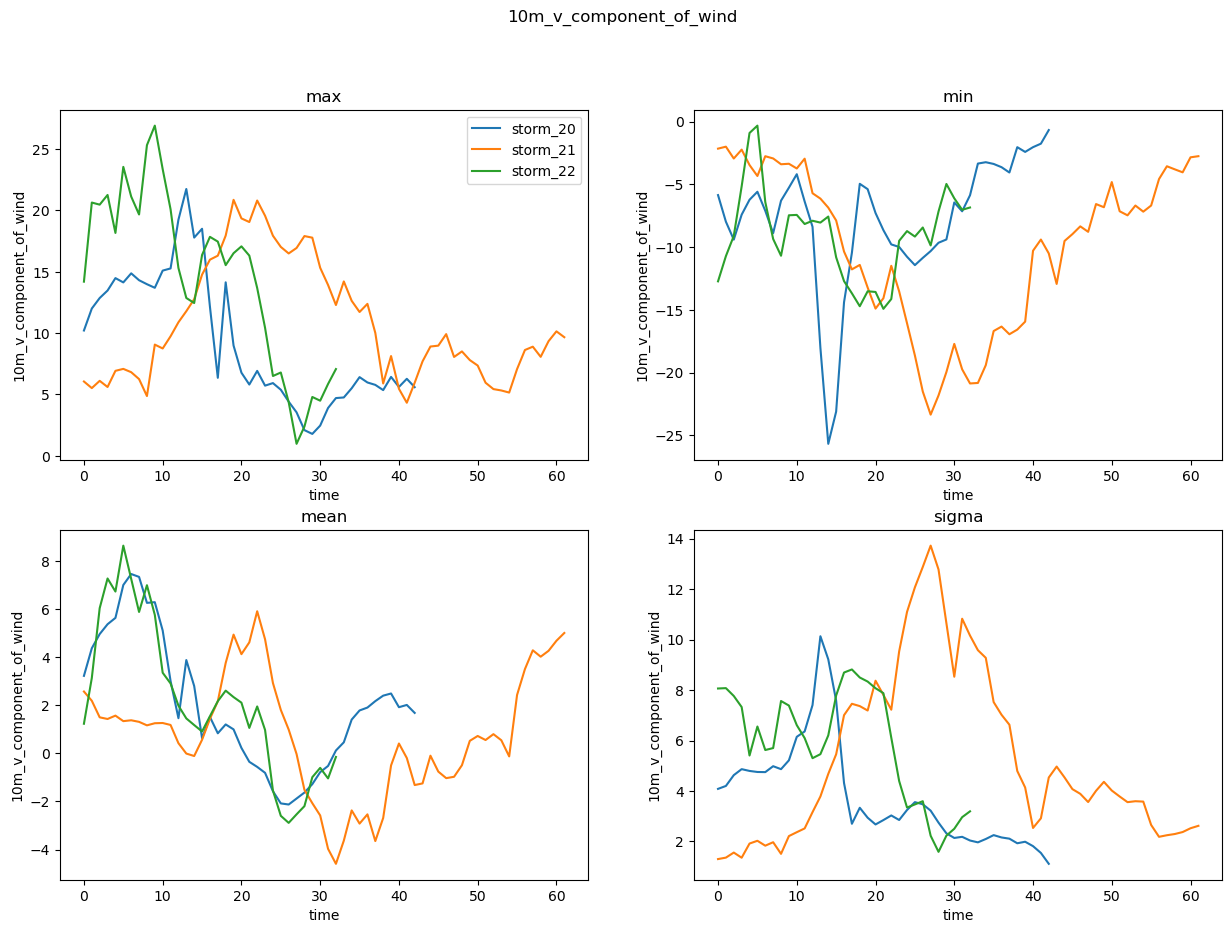

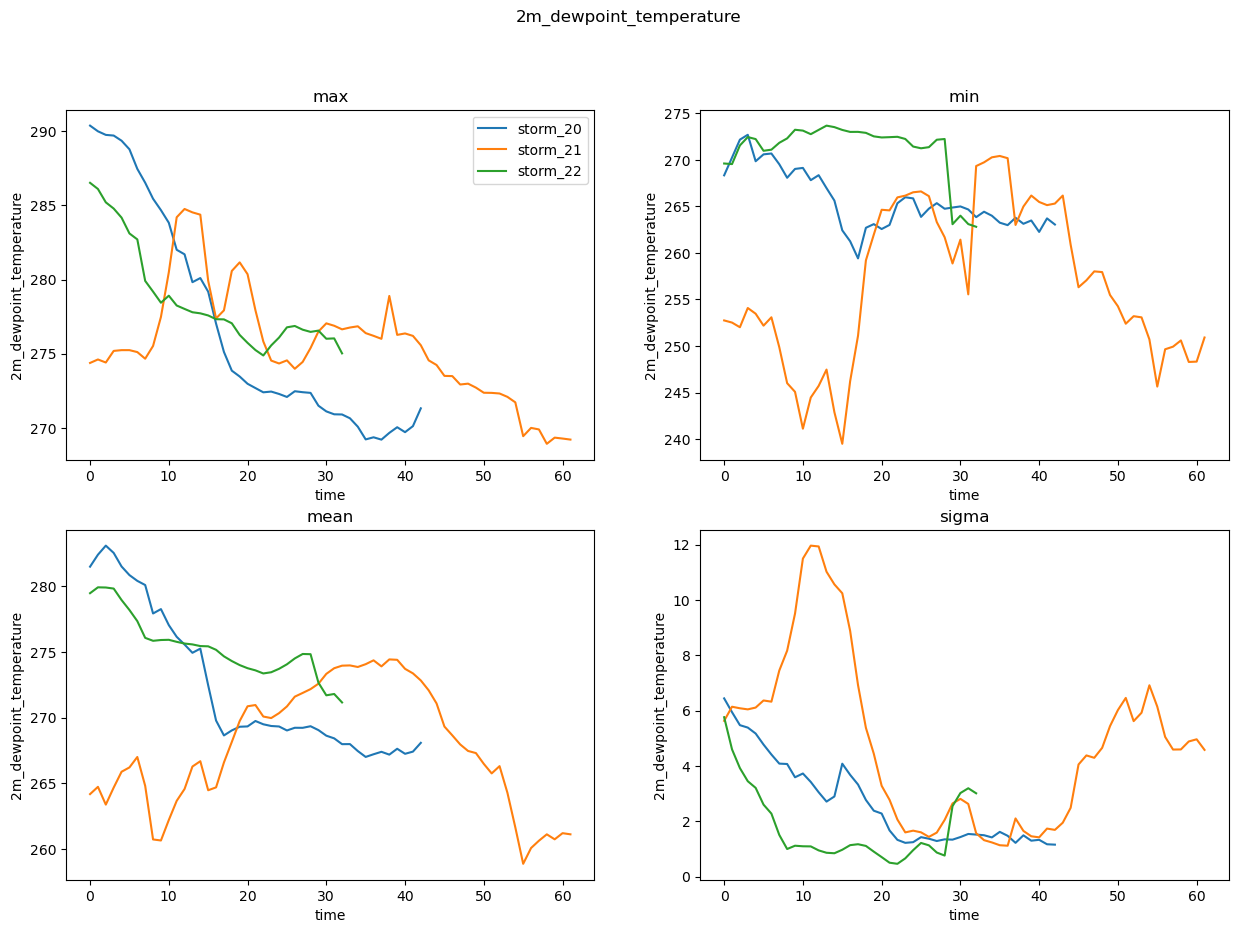

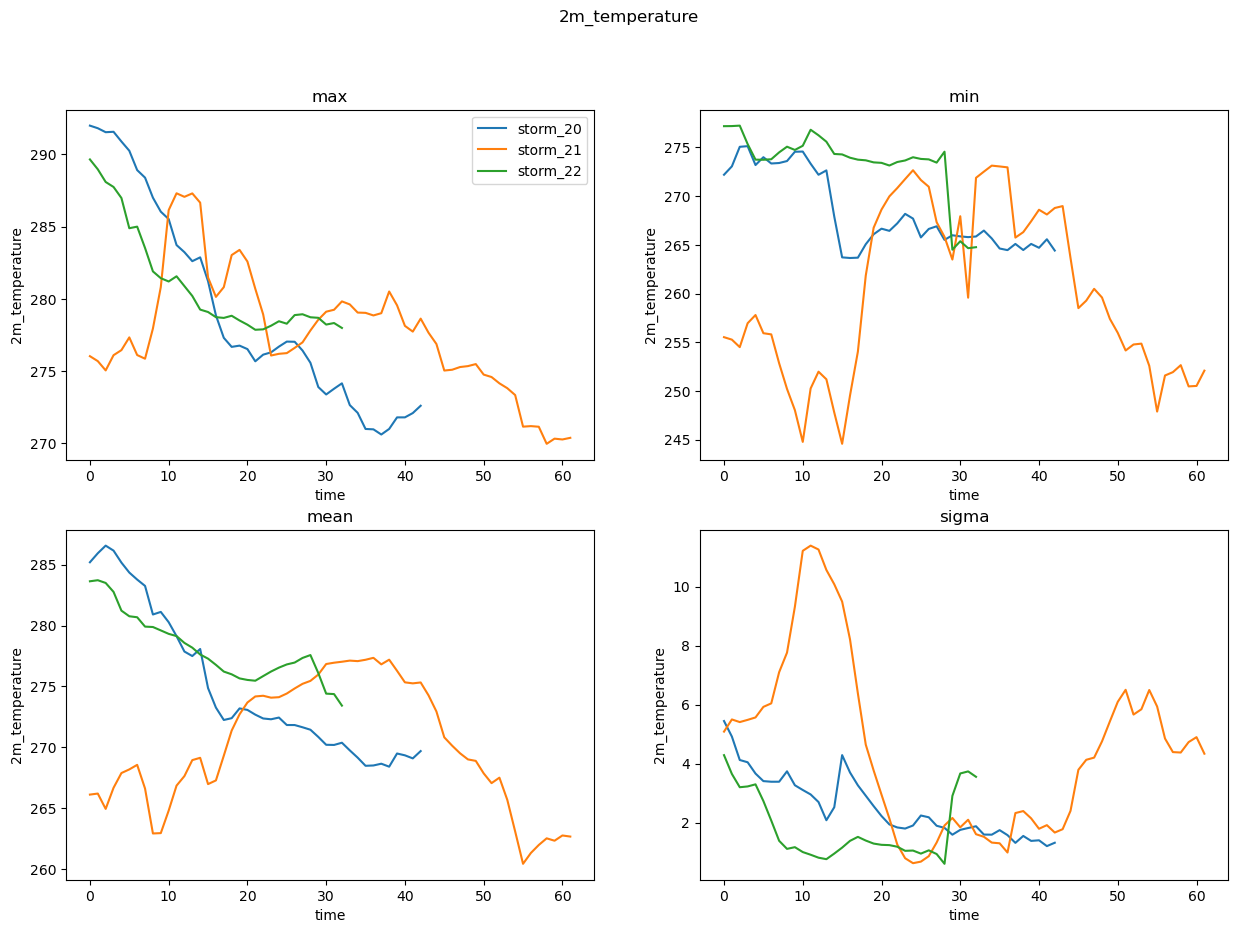

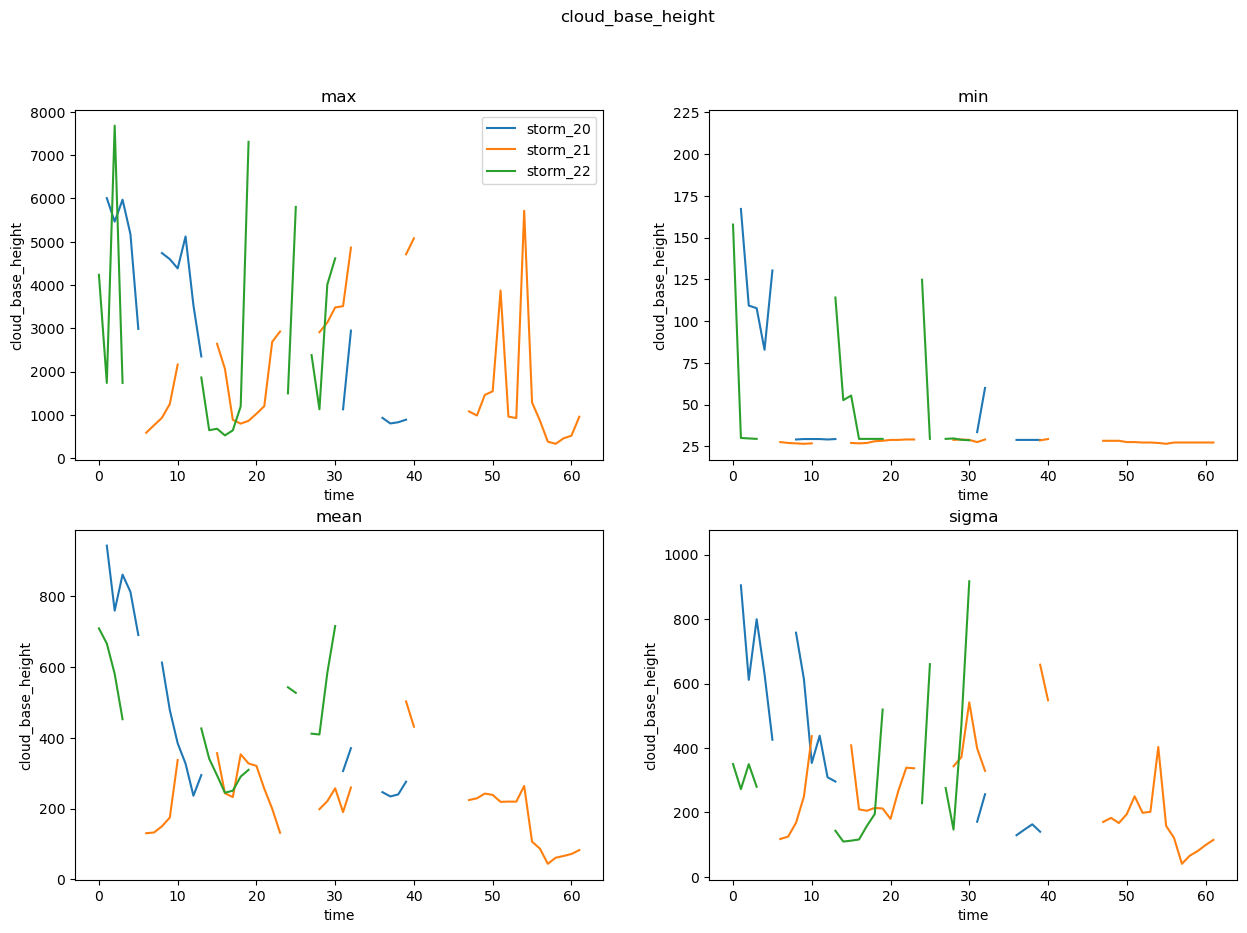

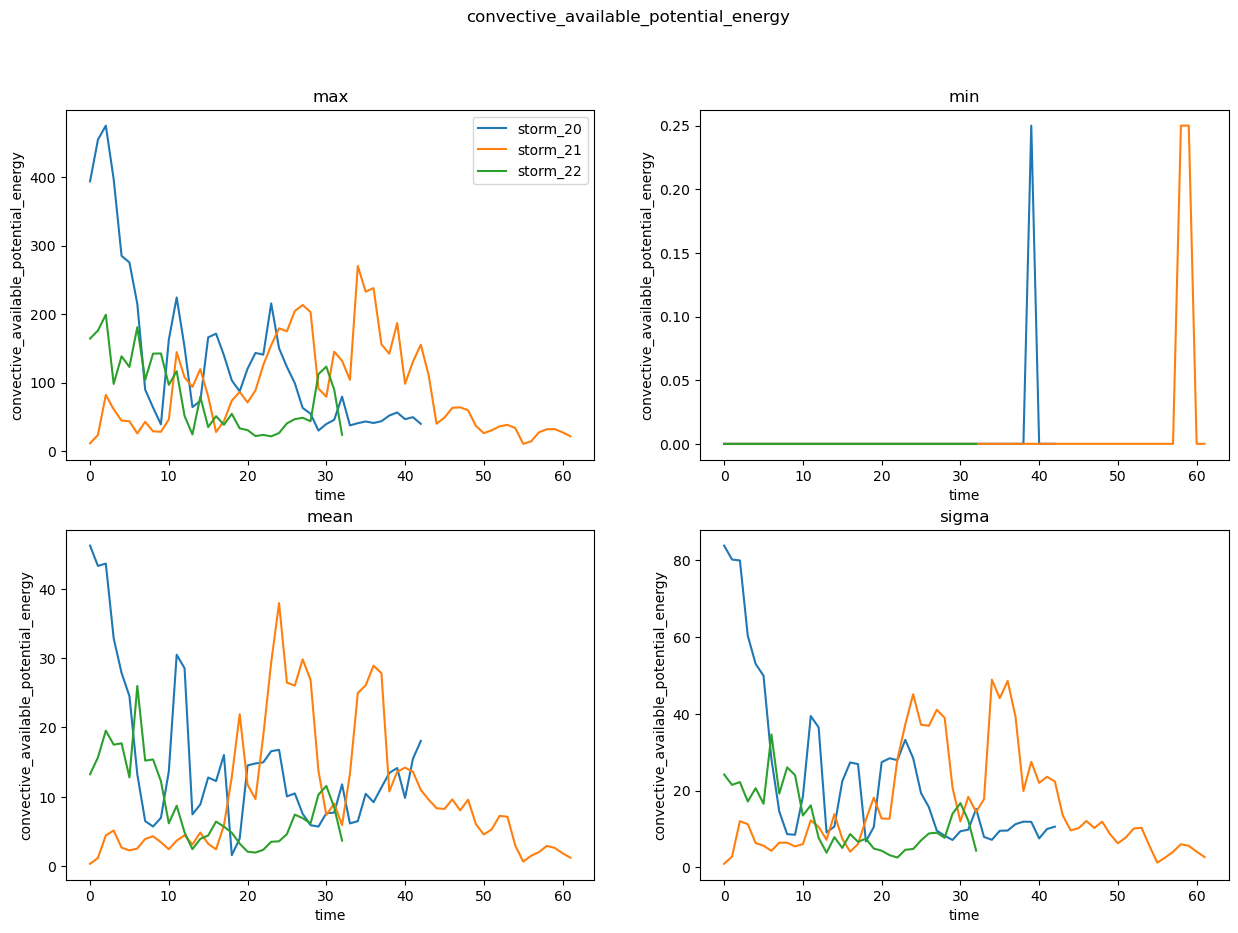

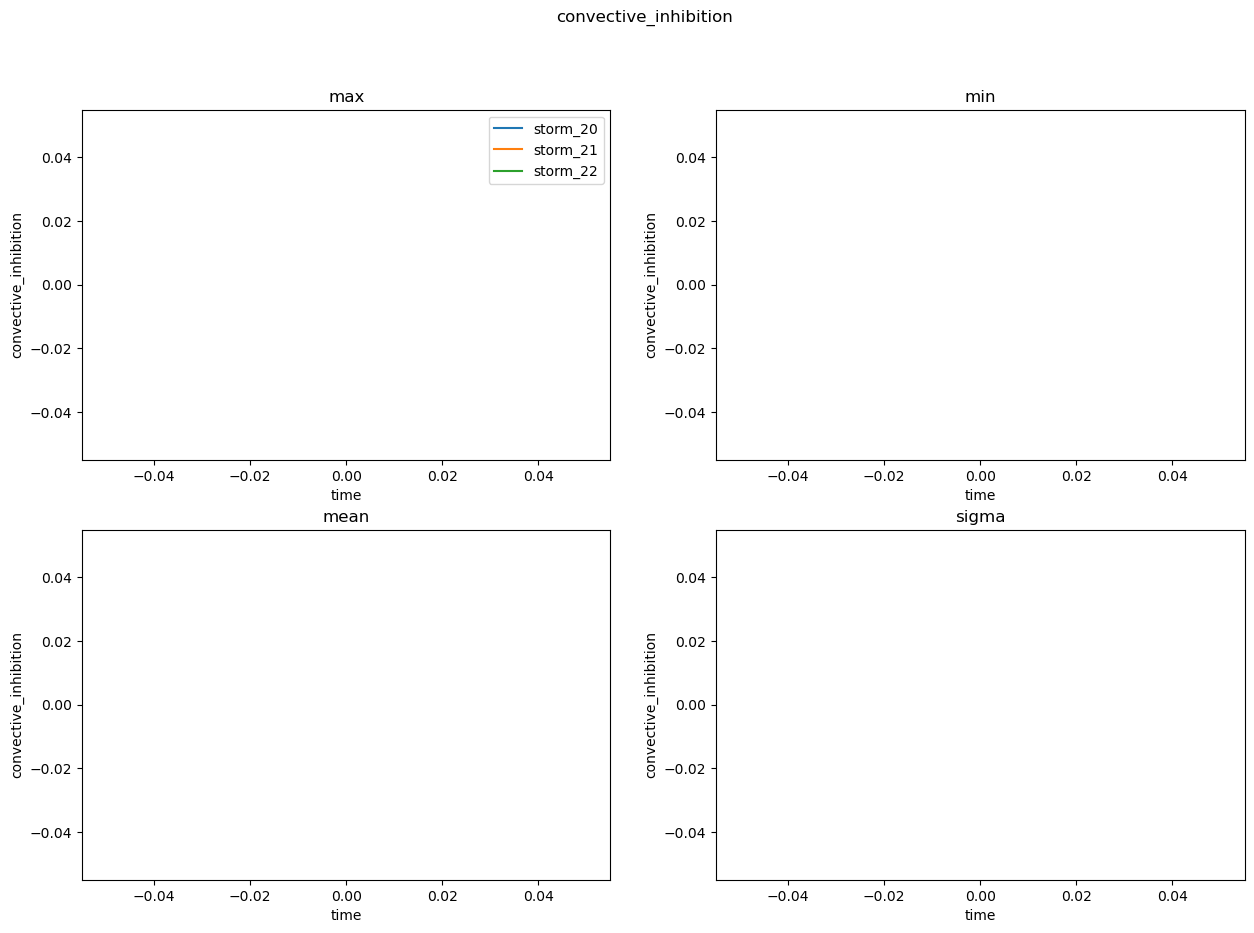

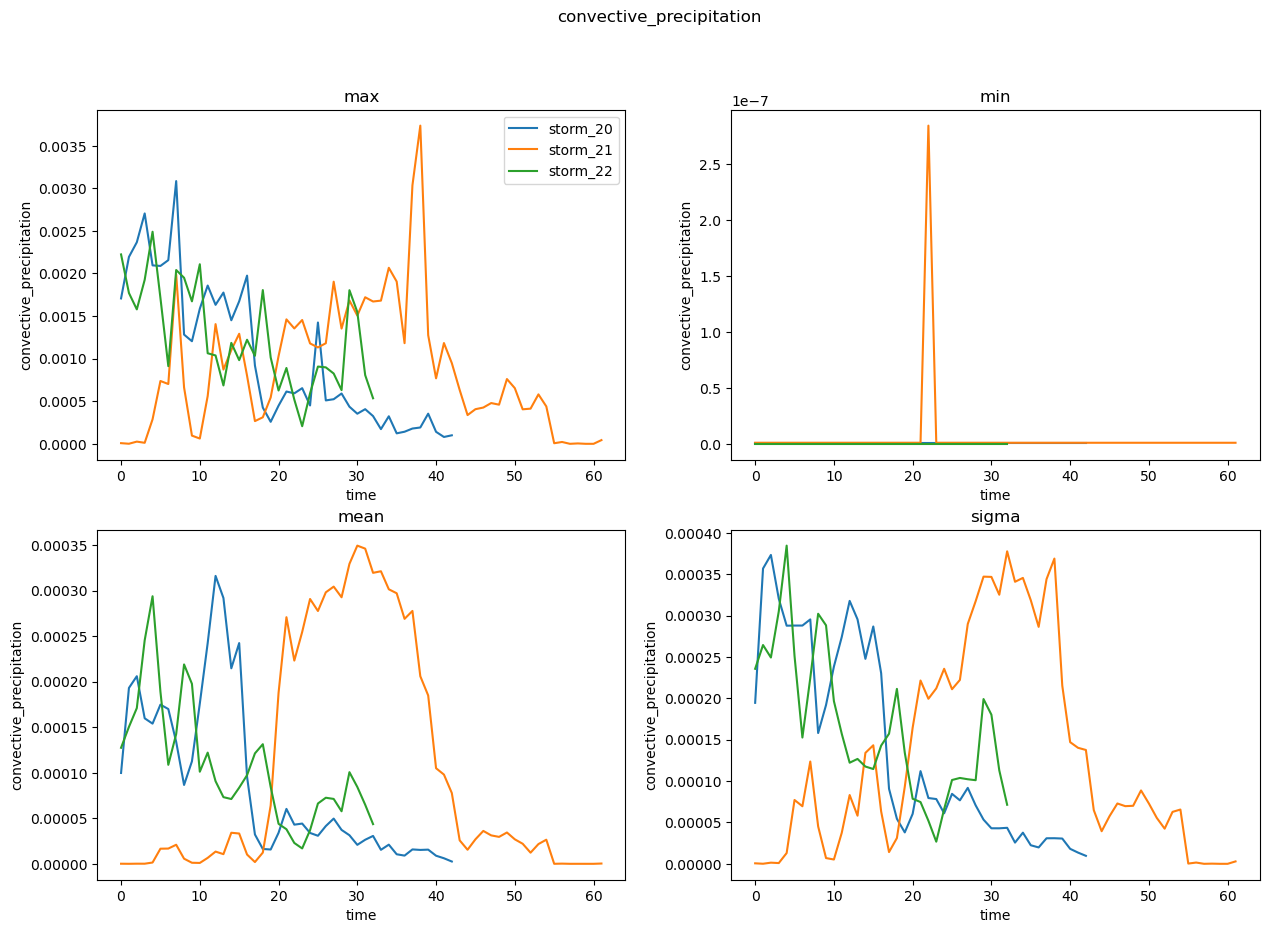

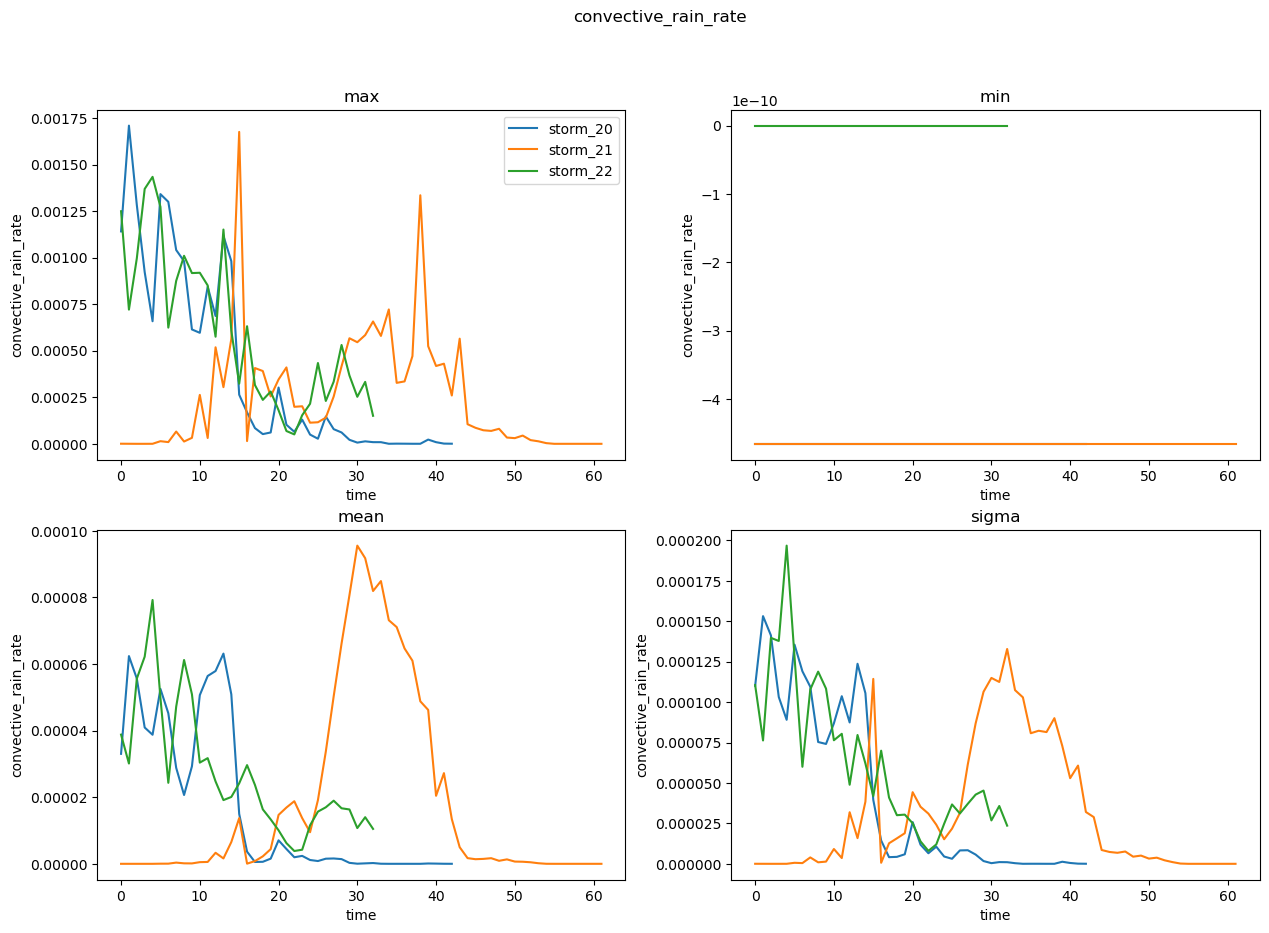

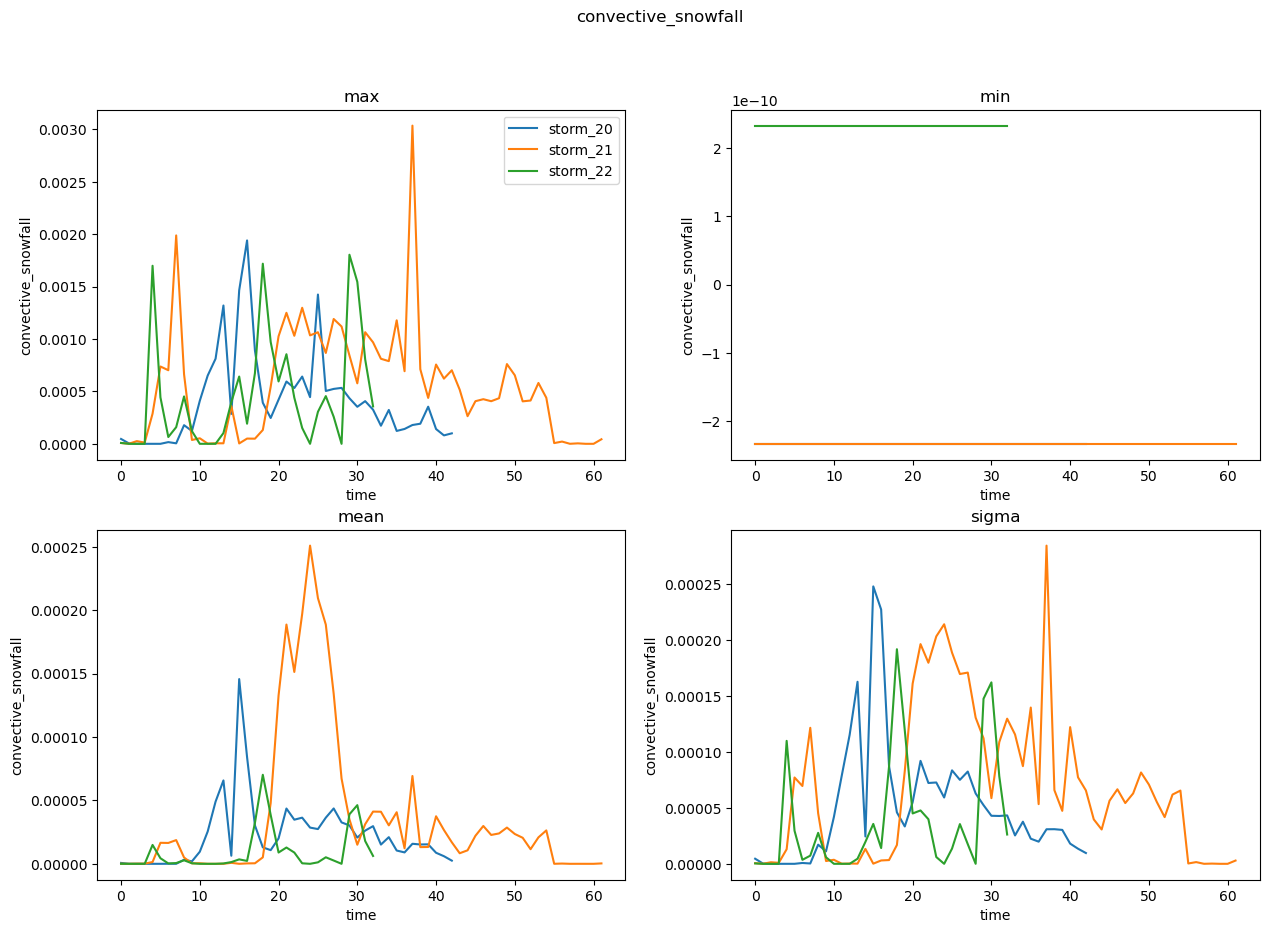

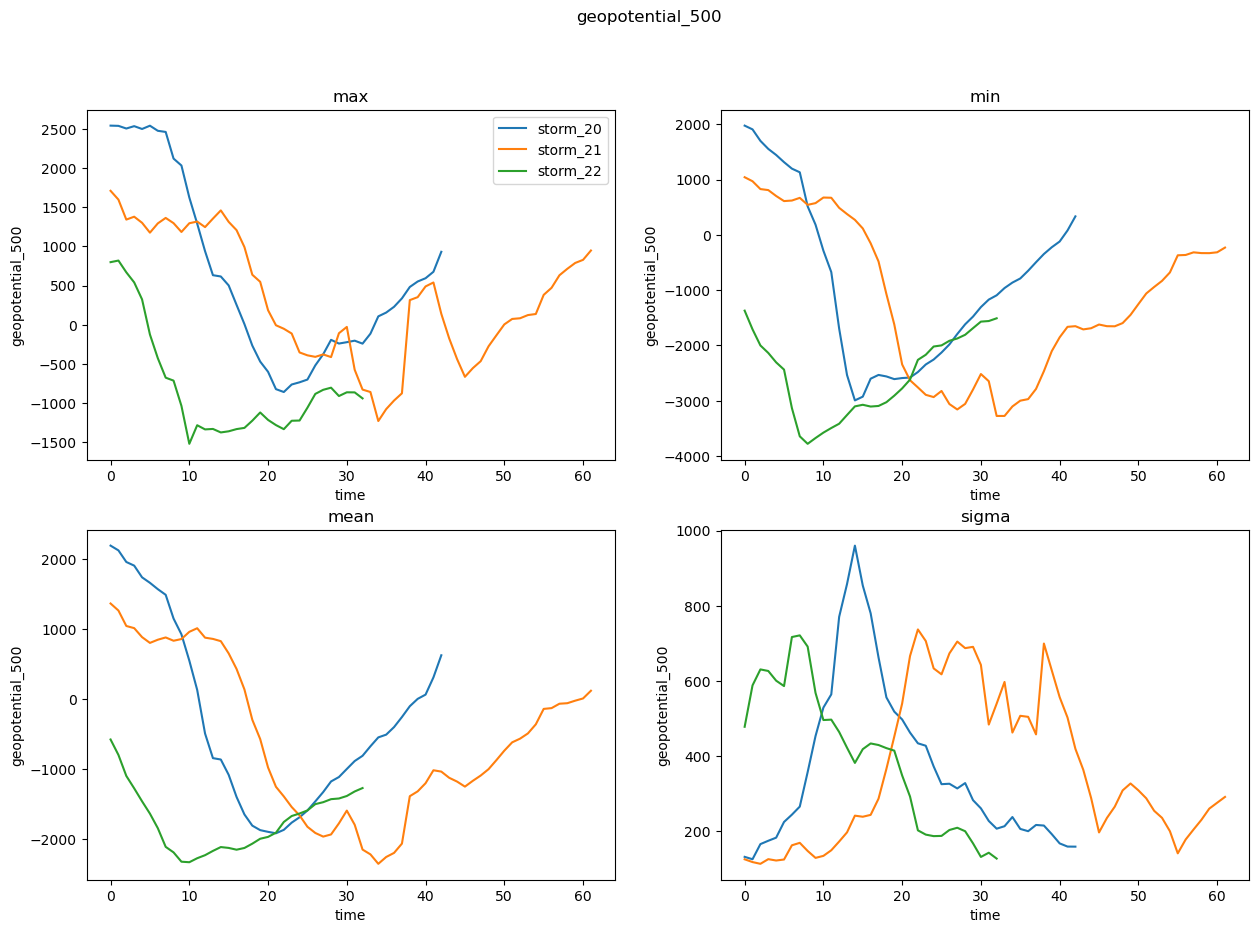

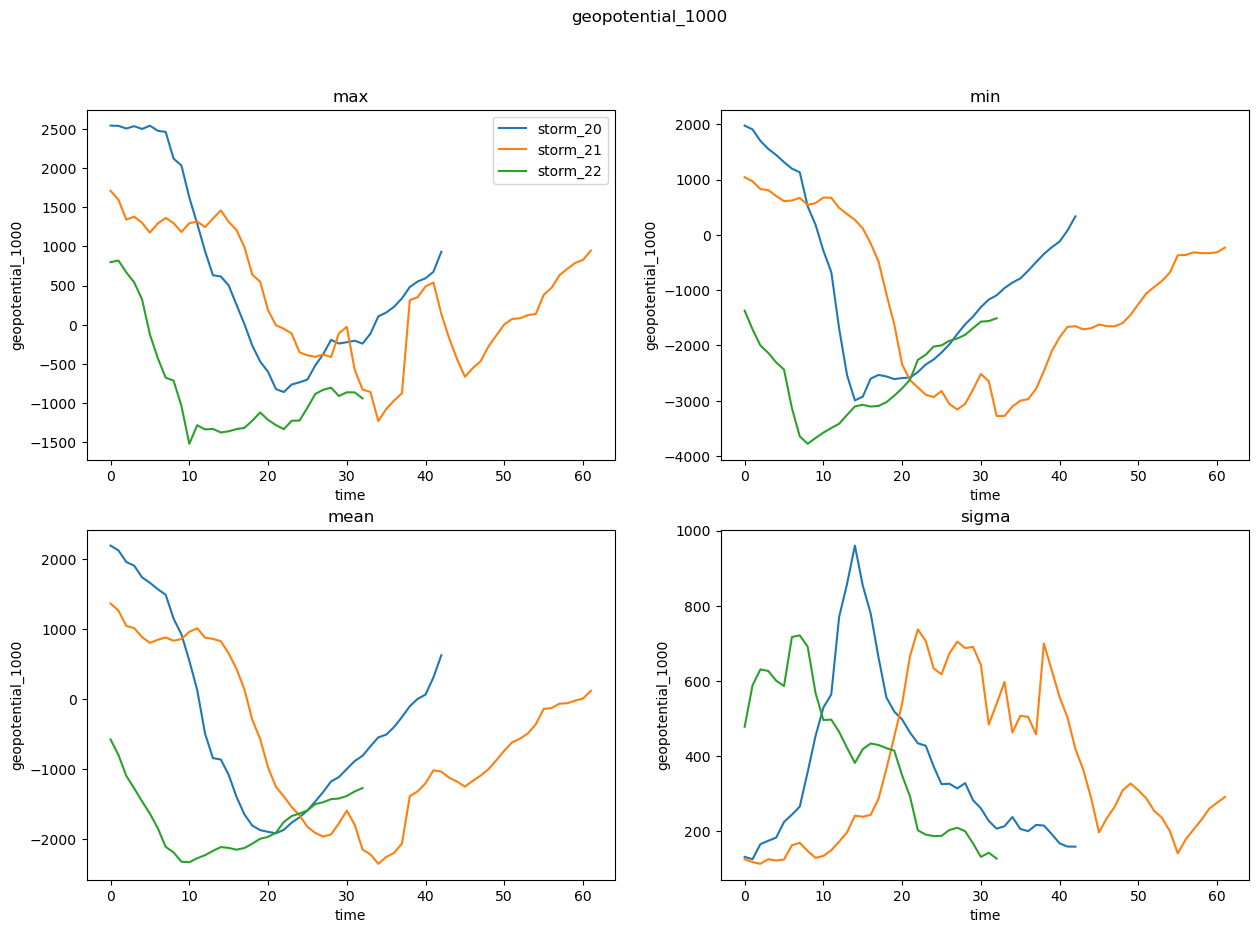

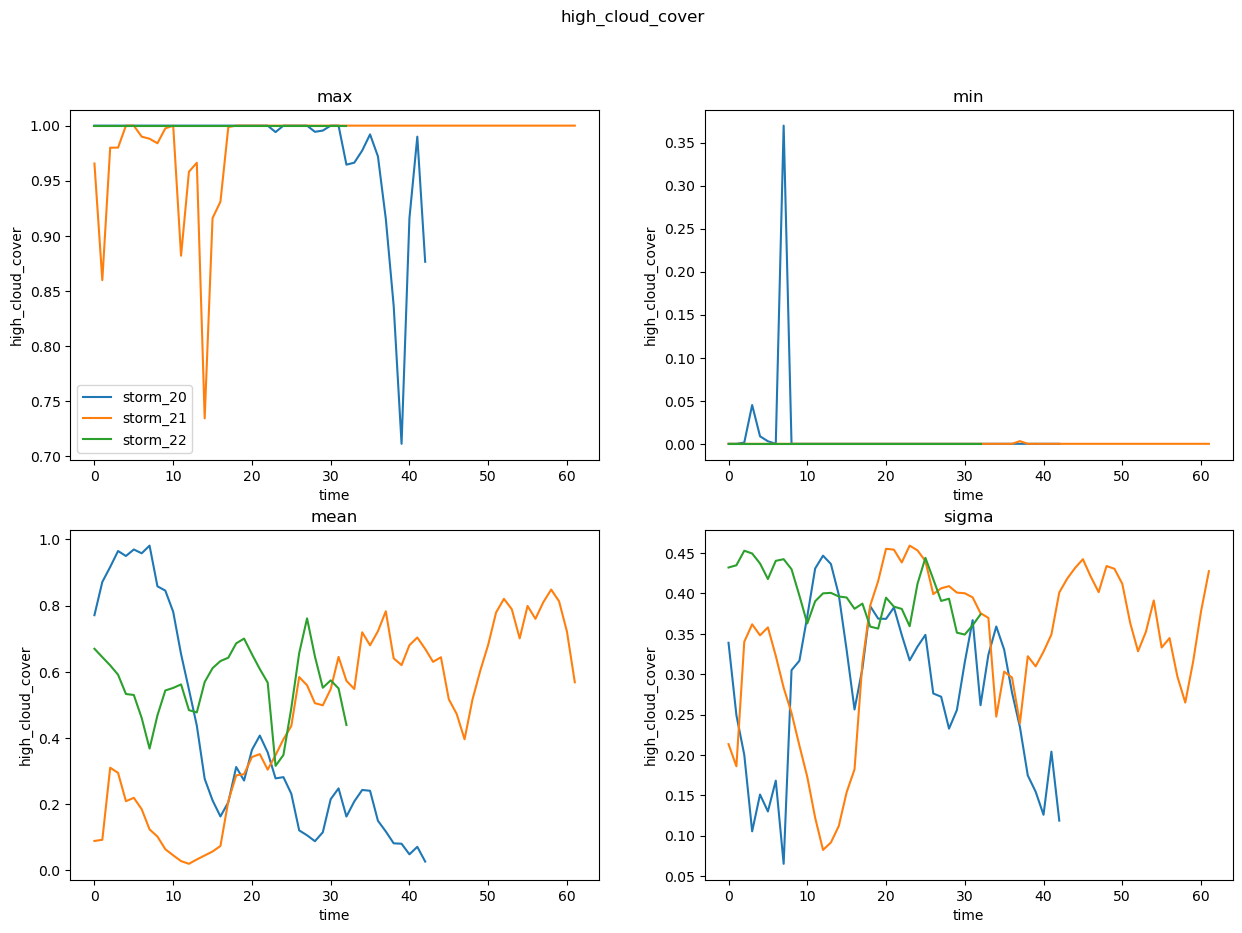

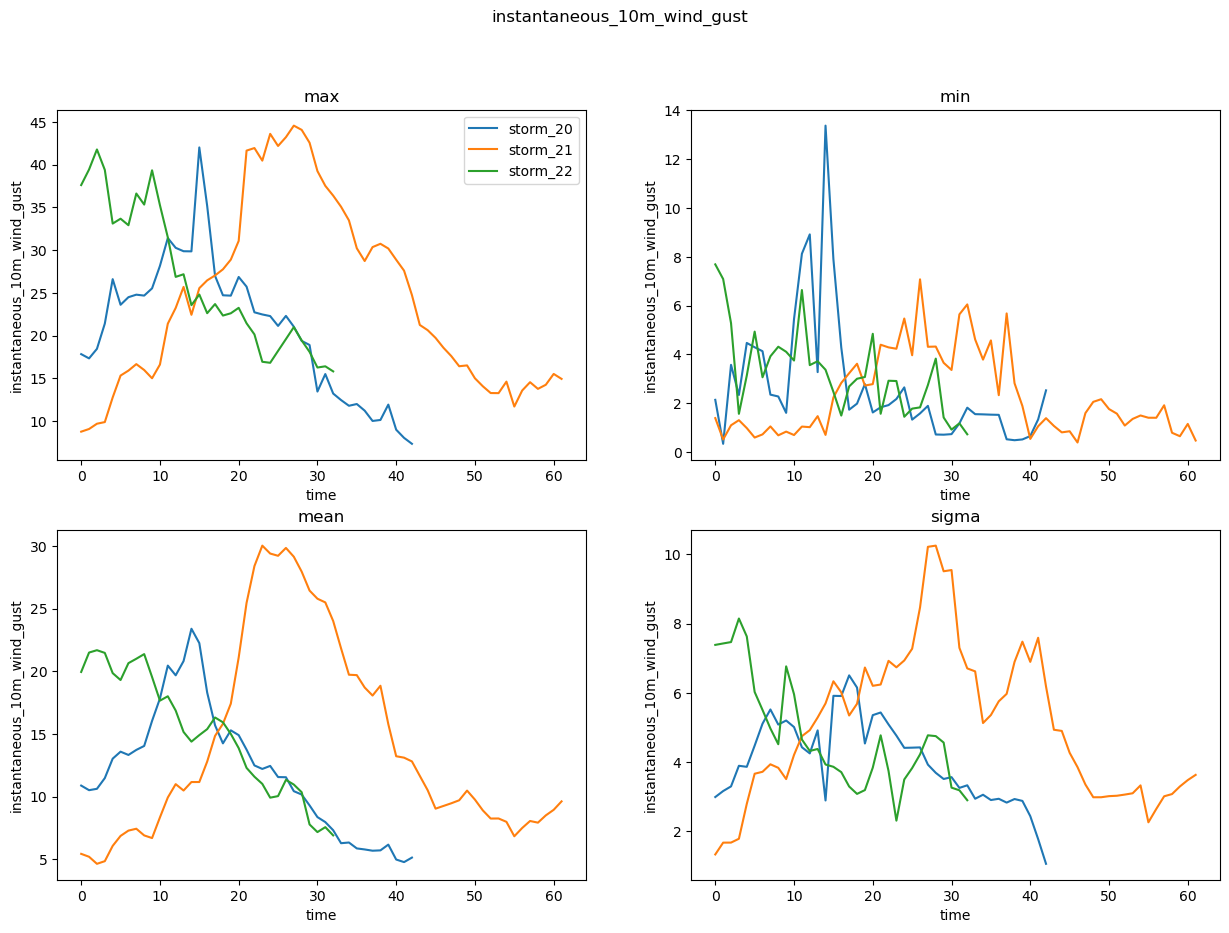

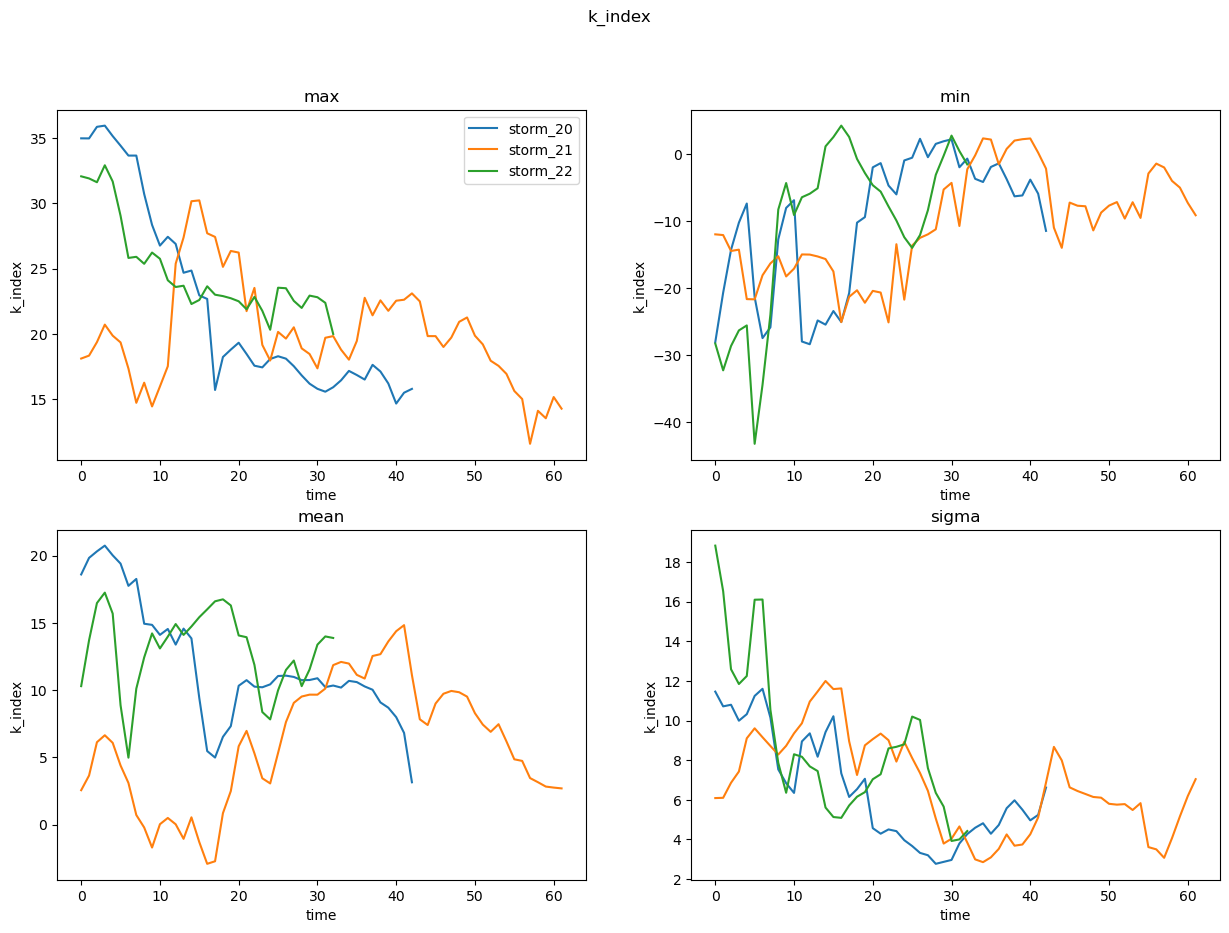

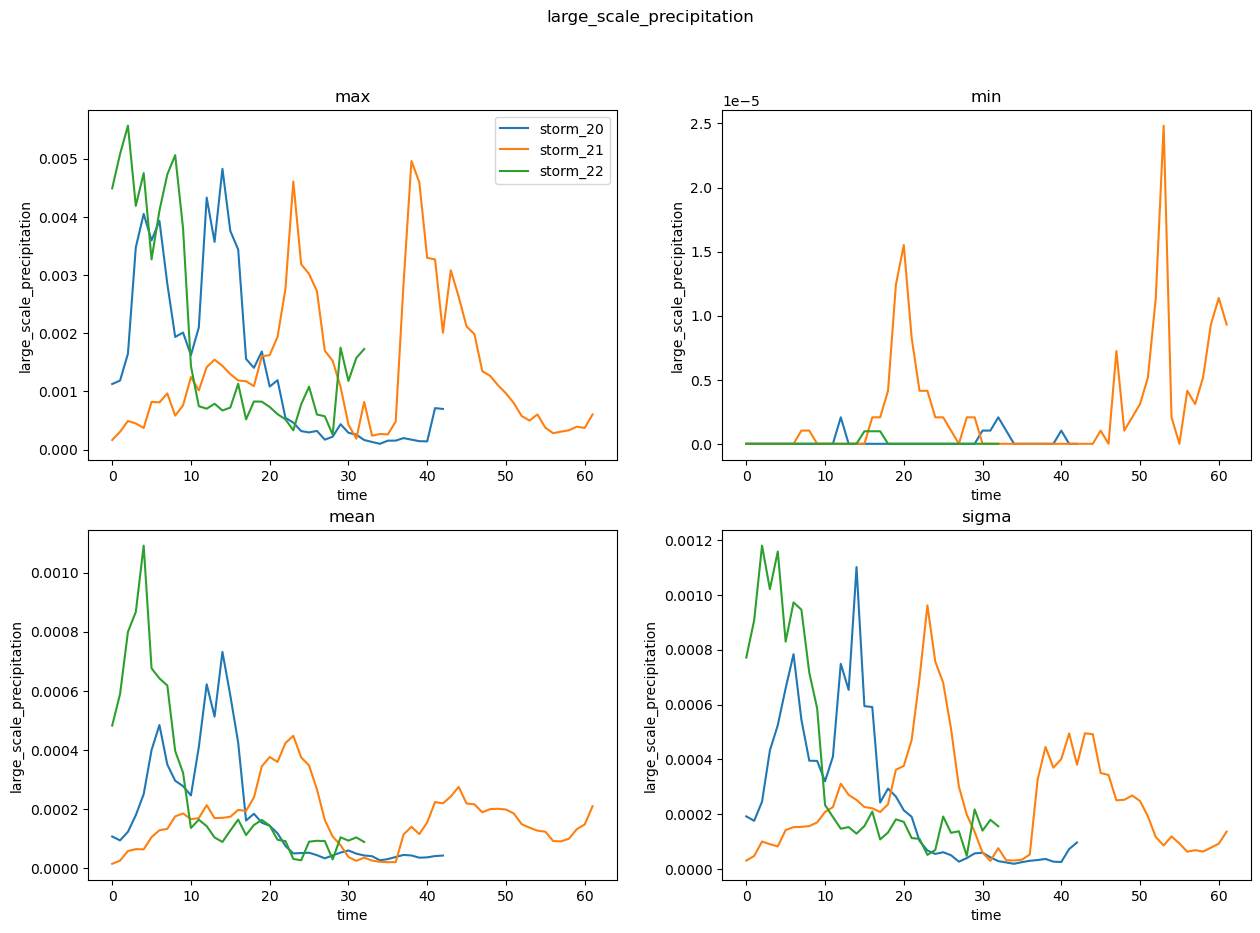

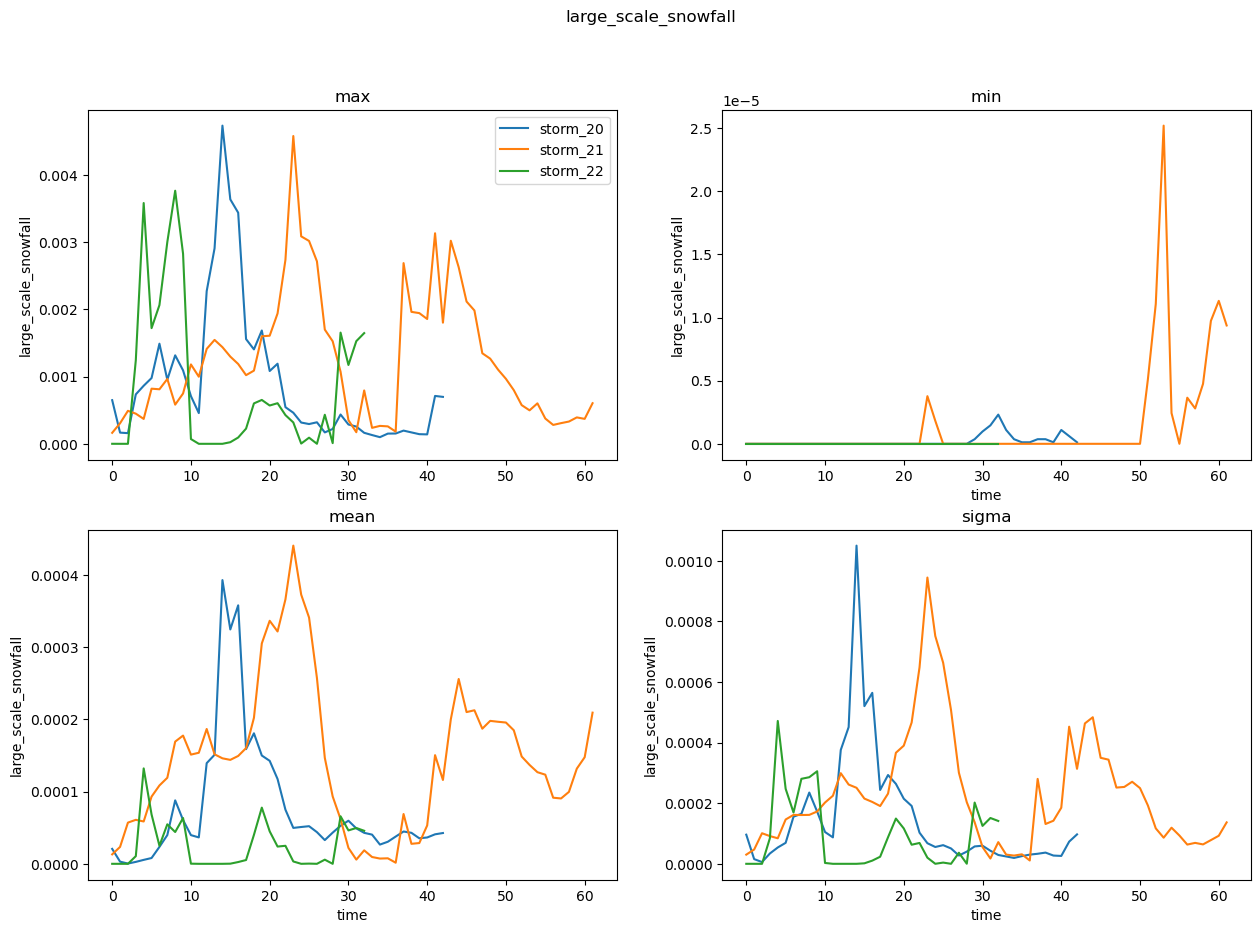

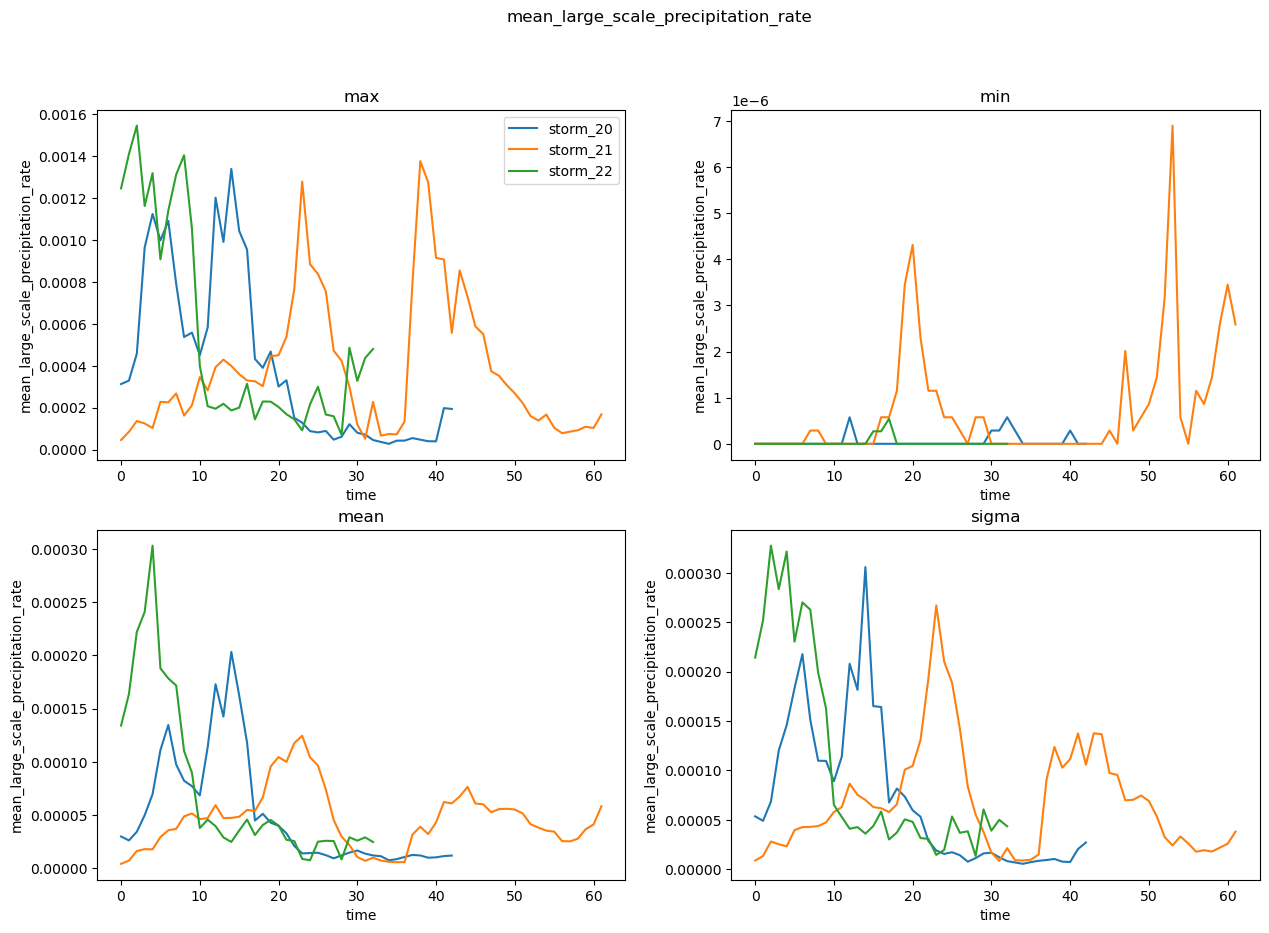

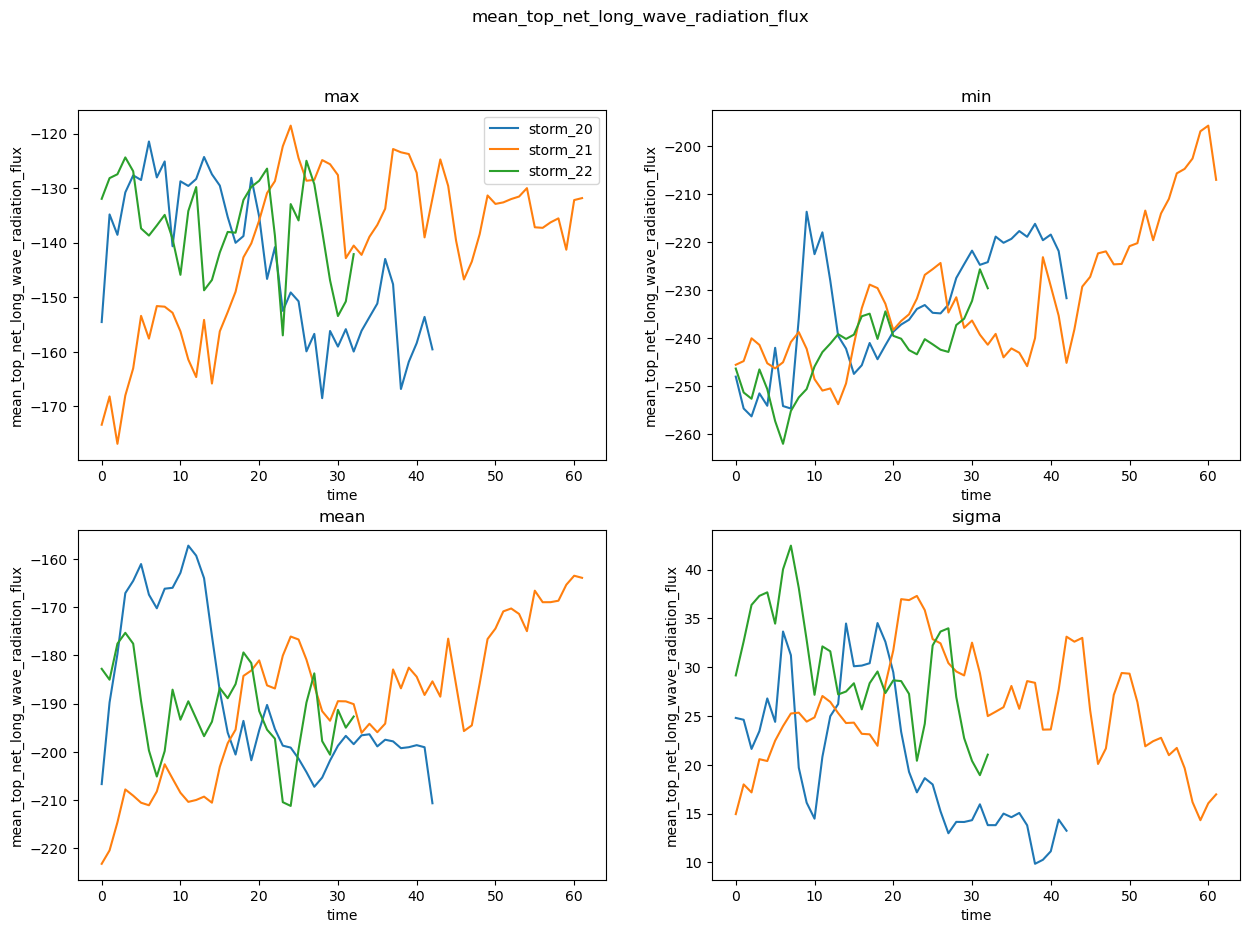

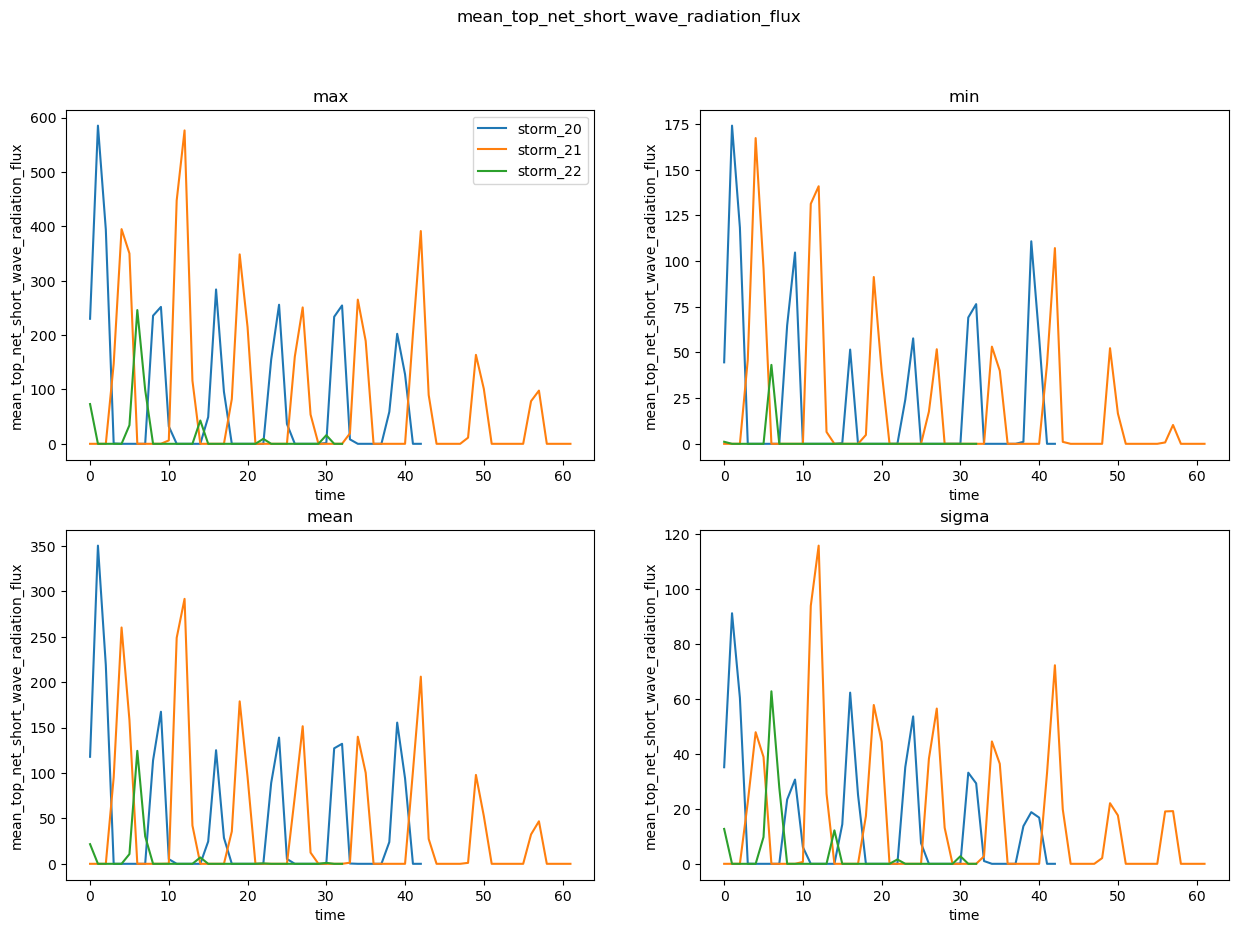

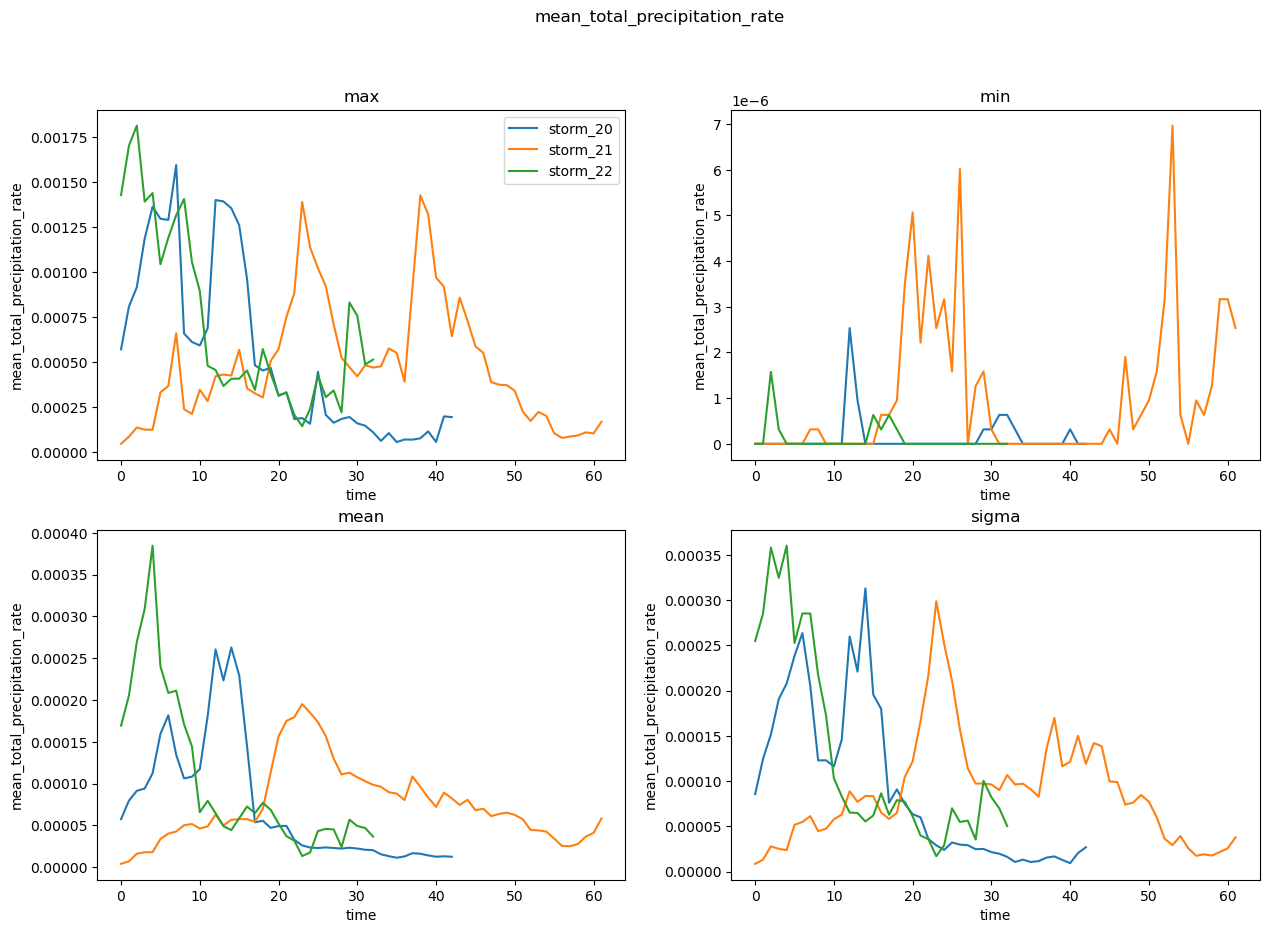

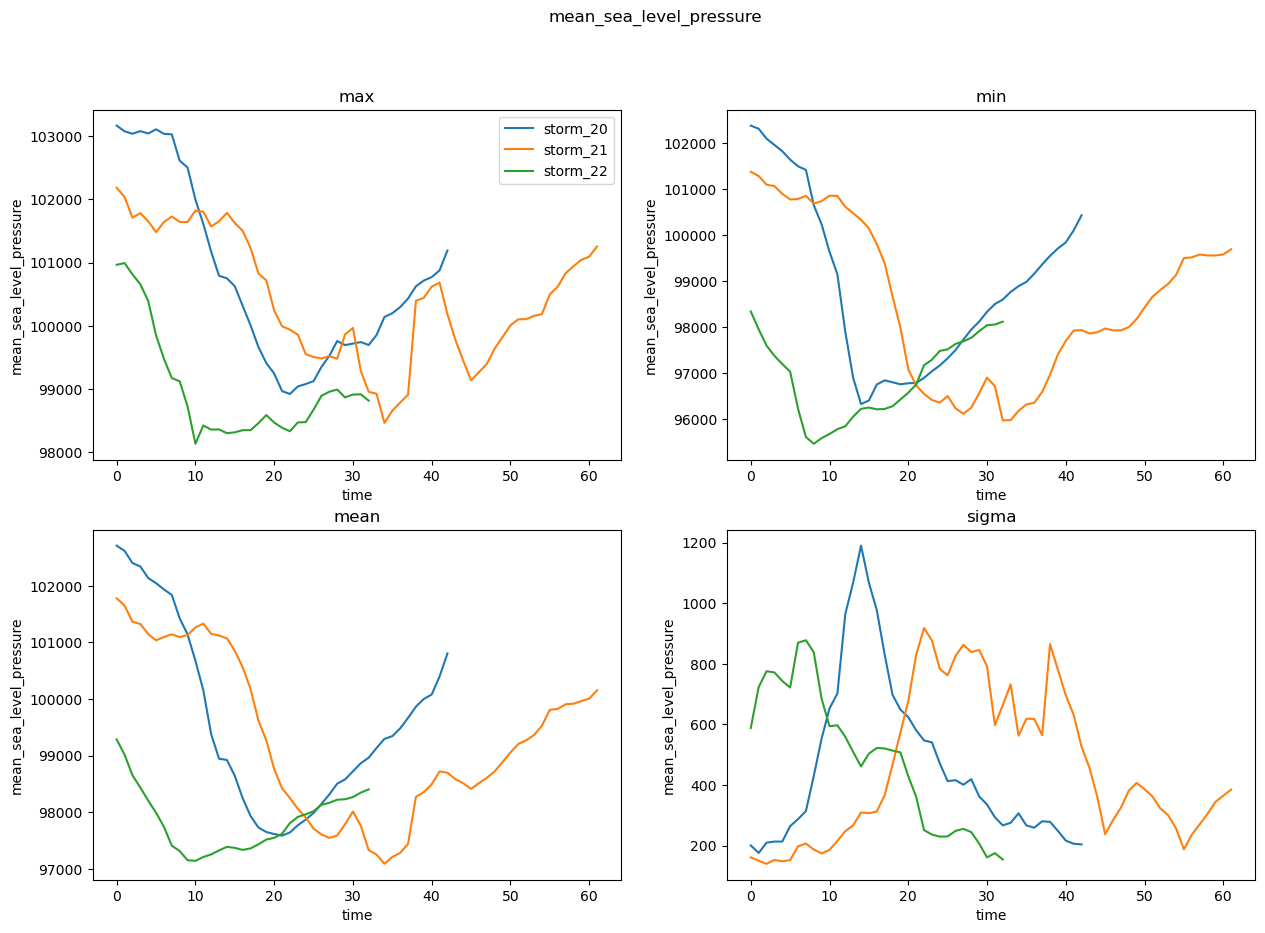

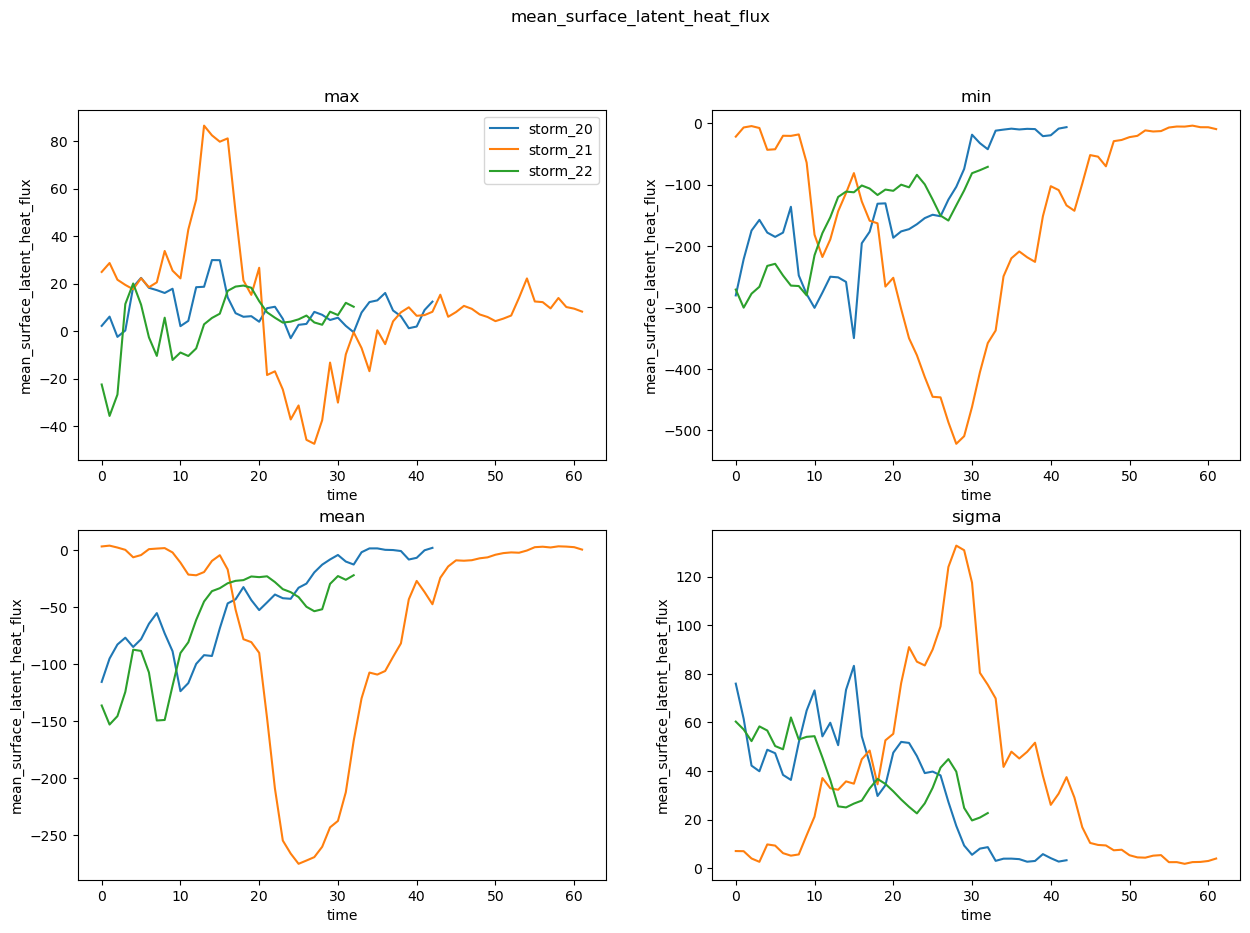

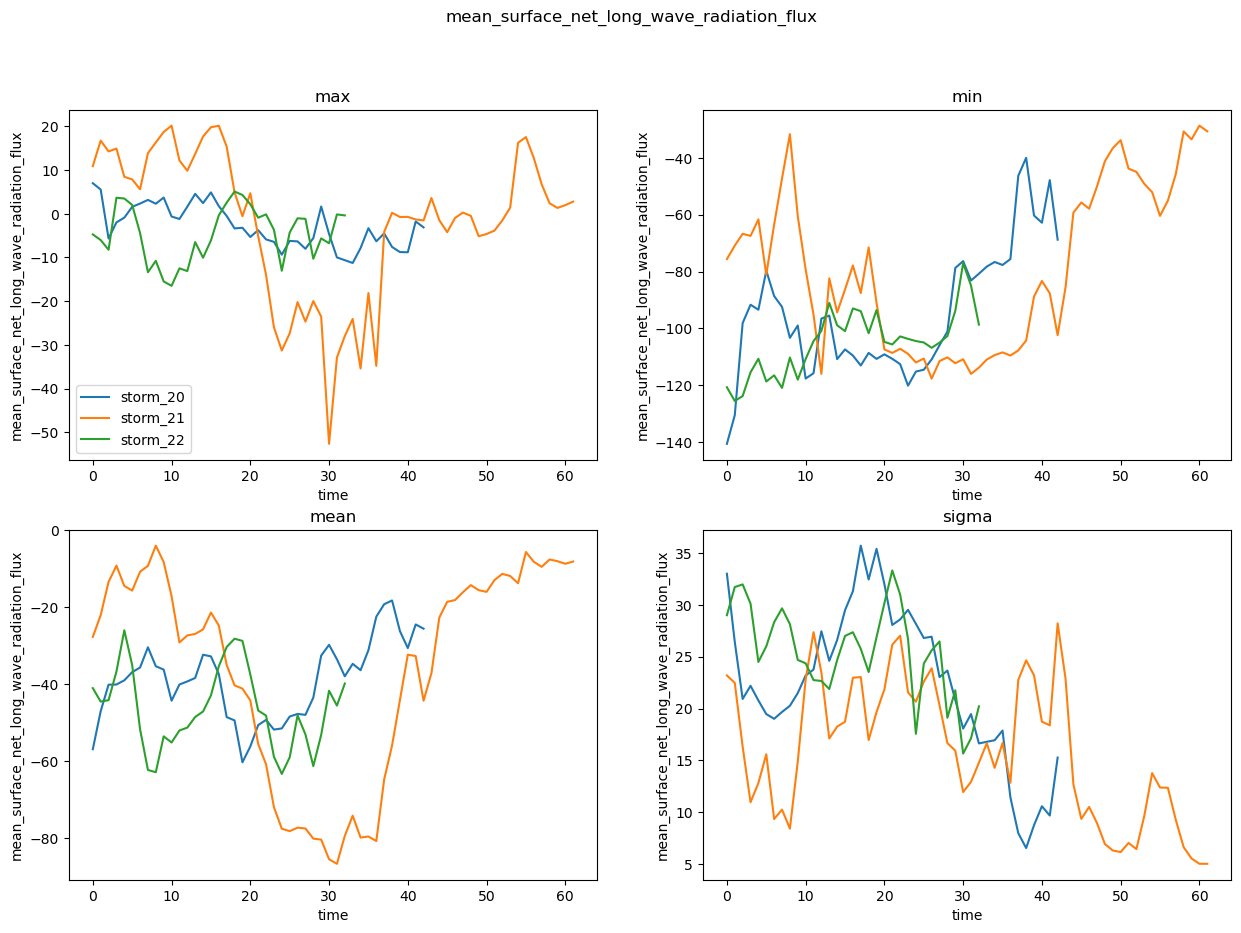

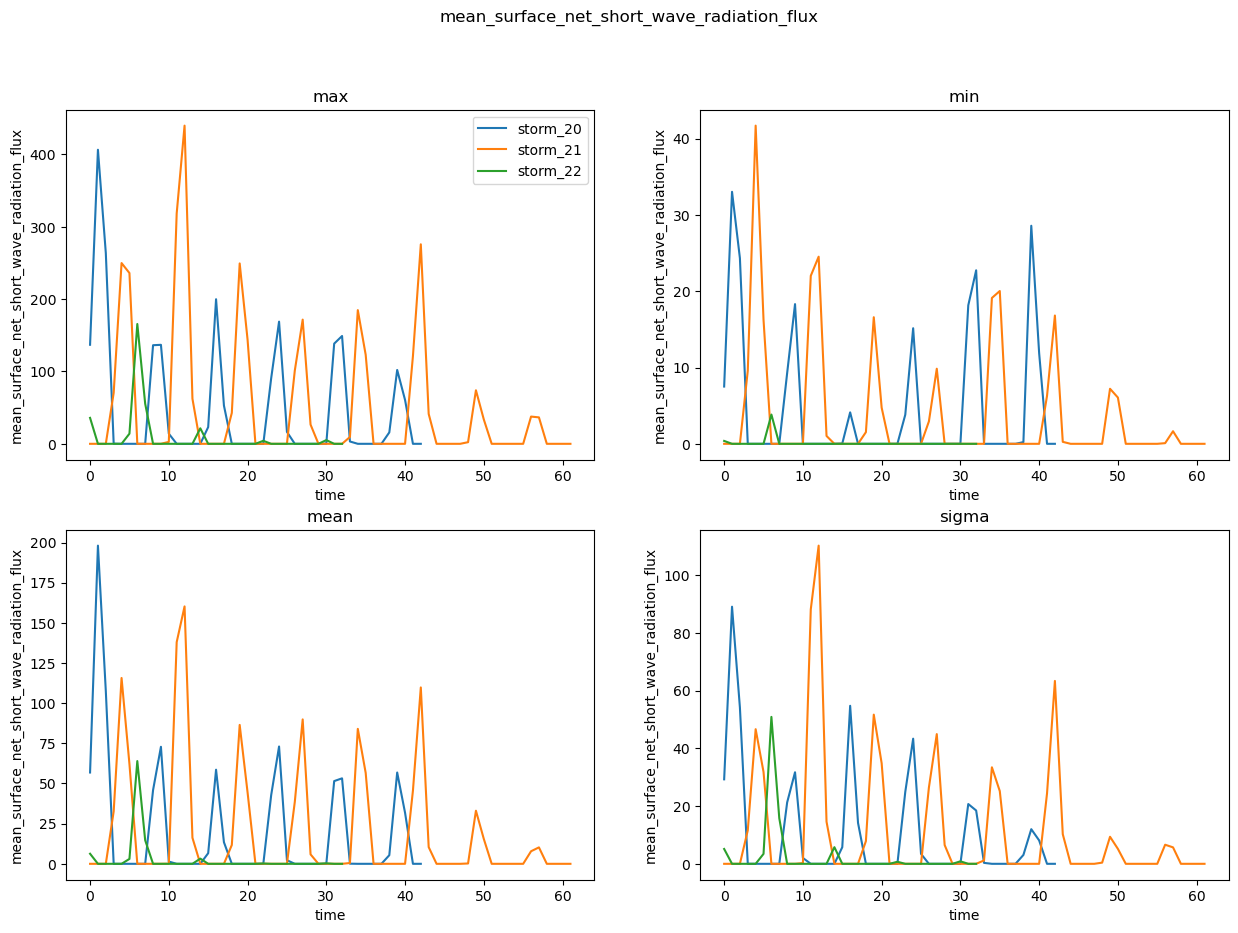

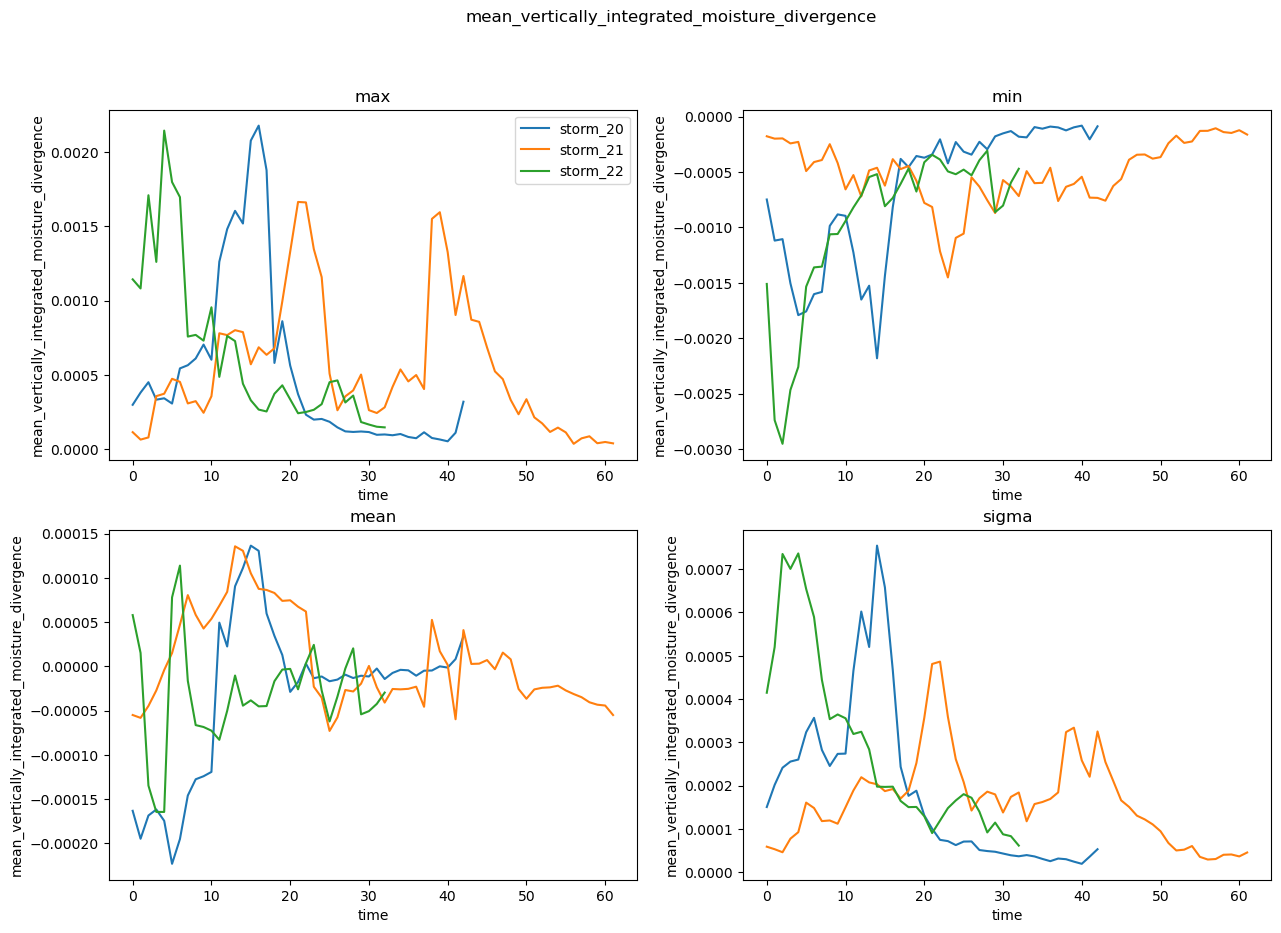

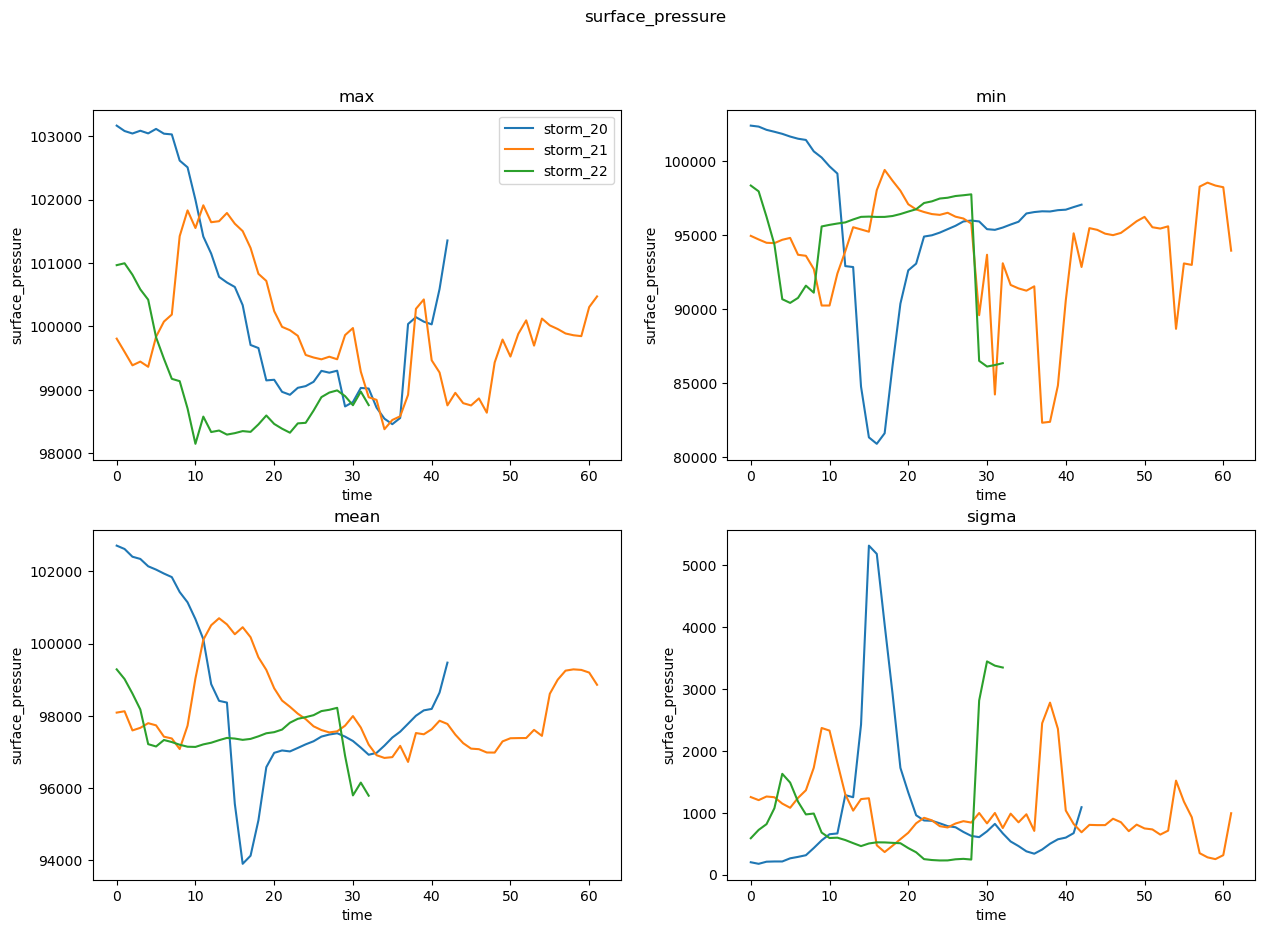

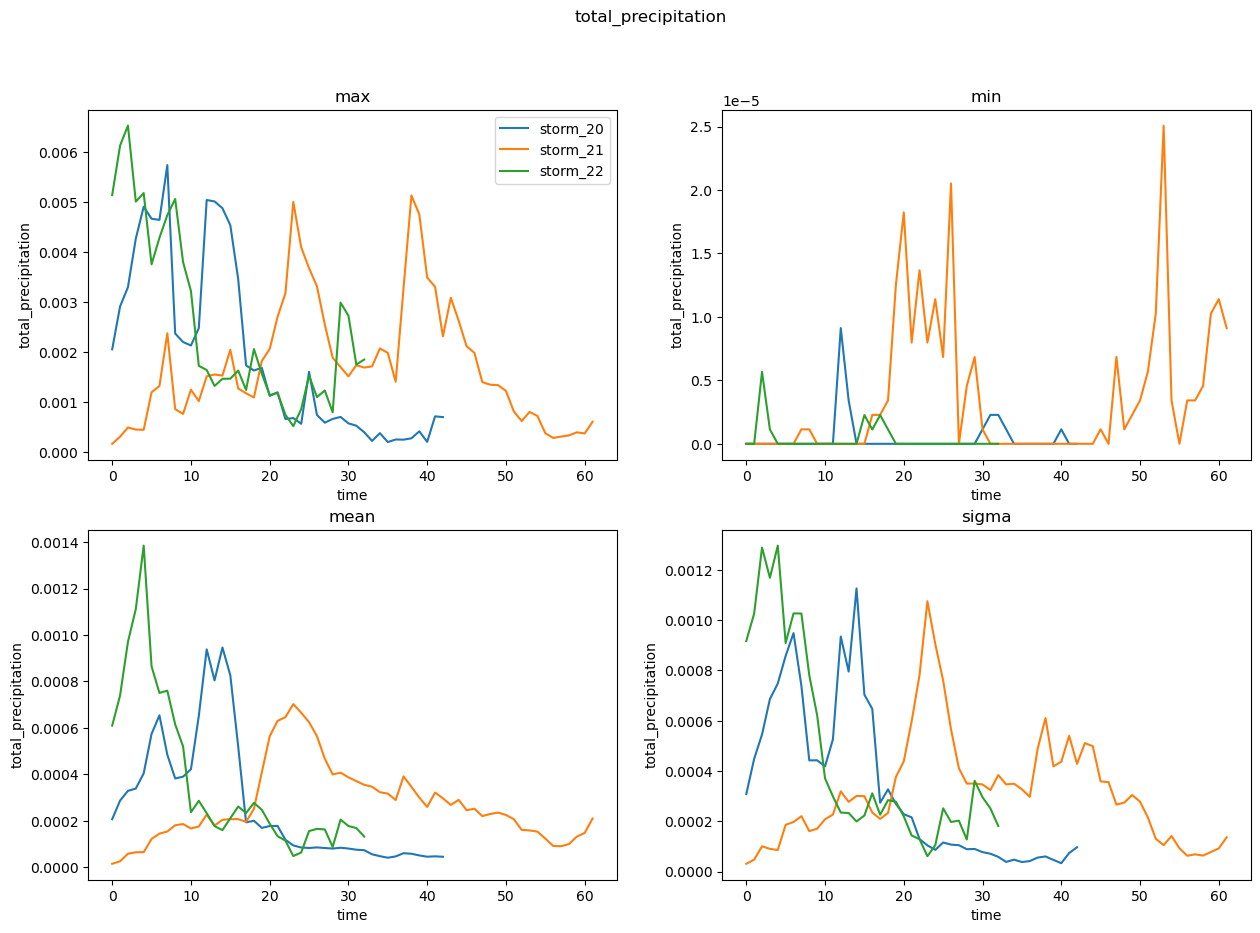

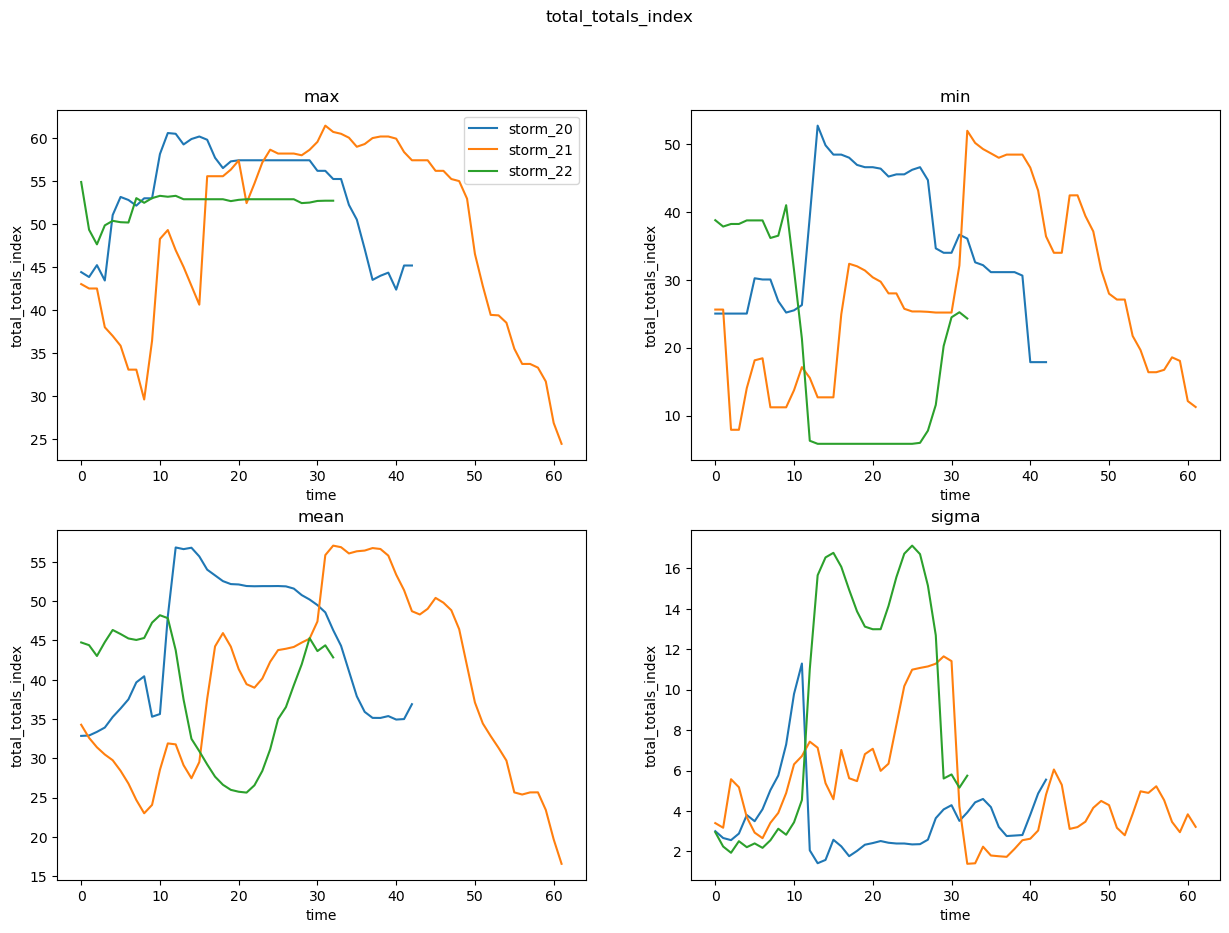

In [15]:
# plot the evolution of the max, min, mean and sigma of each variable
import matplotlib.pyplot as plt

for i in range(0, len(new_name_of_variables)):
    fig, axs = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle(new_name_of_variables[i])

    for j in range(20, 23):#96+1):
        locals()[f'max_{new_name_of_variables[i]}'][f'storm_{j}'].plot(ax=axs[0, 0])
        axs[0, 0].set_title('max')
        axs[0, 0].set_xlabel('time')
        axs[0, 0].set_ylabel(new_name_of_variables[i])
        axs[0, 0].legend(['storm_20', 'storm_21', 'storm_22'])

        locals()[f'min_{new_name_of_variables[i]}'][f'storm_{j}'].plot(ax=axs[0, 1])
        axs[0, 1].set_title('min')
        axs[0, 1].set_xlabel('time')
        axs[0, 1].set_ylabel(new_name_of_variables[i])

        locals()[f'mean_{new_name_of_variables[i]}'][f'storm_{j}'].plot(ax=axs[1, 0])
        axs[1, 0].set_title('mean')
        axs[1, 0].set_xlabel('time')
        axs[1, 0].set_ylabel(new_name_of_variables[i])

        locals()[f'sigma_{new_name_of_variables[i]}'][f'storm_{j}'].plot(ax=axs[1, 1])
        axs[1, 1].set_title('sigma')
        axs[1, 1].set_xlabel('time')
        axs[1, 1].set_ylabel(new_name_of_variables[i])

    #plt.savefig('/Users/fabienaugsburger/Documents/GitHub/master-project/case_study/plots/' + new_name_of_variables[i] + '.png')
    plt.show()
    plt.close()

In [48]:
# calculate the running mean of the max, min, mean and sigma of each variable
for i in range(0, len(new_name_of_variables)):
    locals()[f'running_mean_max_{new_name_of_variables[i]}'] = pd.DataFrame()
    locals()[f'running_mean_min_{new_name_of_variables[i]}'] = pd.DataFrame()
    locals()[f'running_mean_mean_{new_name_of_variables[i]}'] = pd.DataFrame()
    locals()[f'running_mean_sigma_{new_name_of_variables[i]}'] = pd.DataFrame()

    for j in range(1, 96+1):
        locals()[f'running_mean_max_{new_name_of_variables[i]}'][f'storm_{j}'] = locals()[f'max_{new_name_of_variables[i]}'][f'storm_{j}'].rolling(window=5).mean()
        locals()[f'running_mean_min_{new_name_of_variables[i]}'][f'storm_{j}'] = locals()[f'min_{new_name_of_variables[i]}'][f'storm_{j}'].rolling(window=5).mean()
        locals()[f'running_mean_mean_{new_name_of_variables[i]}'][f'storm_{j}'] = locals()[f'mean_{new_name_of_variables[i]}'][f'storm_{j}'].rolling(window=5).mean()
        locals()[f'running_mean_sigma_{new_name_of_variables[i]}'][f'storm_{j}'] = locals()[f'sigma_{new_name_of_variables[i]}'][f'storm_{j}'].rolling(window=5).mean()

# plot the running mean of the max, min, mean and sigma of each variable
for i in range(0, len(new_name_of_variables)):
    fig, axs = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle(new_name_of_variables[i])

    for j in range(1, 96+1):
        locals()[f'running_mean_max_{new_name_of_variables[i]}'][f'storm_{j}'].plot(ax=axs[0, 0])
        axs[0, 0].set_title('running mean max')
        axs[0, 0].set_xlabel('time')
        axs[0, 0].set_ylabel(new_name_of_variables[i])

        locals()[f'running_mean_min_{new_name_of_variables[i]}'][f'storm_{j}'].plot(ax=axs[0, 1])
        axs[0, 1].set_title('running mean min')
        axs[0, 1].set_xlabel('time')
        axs[0, 1].set_ylabel(new_name_of_variables[i])

        locals()[f'running_mean_mean_{new_name_of_variables[i]}'][f'storm_{j}'].plot(ax=axs[1, 0])
        axs[1, 0].set_title('running mean mean')
        axs[1, 0].set_xlabel('time')
        axs[1, 0].set_ylabel(new_name_of_variables[i])

        locals()[f'running_mean_sigma_{new_name_of_variables[i]}'][f'storm_{j}'].plot(ax=axs[1, 1])
        axs[1, 1].set_title('running mean sigma')
        axs[1, 1].set_xlabel('time')
        axs[1, 1].set_ylabel(new_name_of_variables[i])

    plt.savefig('/Users/fabienaugsburger/Documents/GitHub/master-project/case_study/plots/running_mean_' + new_name_of_variables[i] + '.png')
    plt.close()